# Experiment 10-12


### Dataset 1:
- **Dataset:** 5m | 60º
- **Sizes:** large
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Dataset 2:
- **Dataset:** 3m | 60º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. 5m large
2. 3m small/mid + 5m large
3. 3m mid + 5m large

In [1]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"
experiment_number = 4

# The folder you want to navigate to (relative to the root)
target_folder = f"docs/Experimentos/2 Finetuning/{experiment_number} set/runs/detect/"

### Init

In [2]:
scale: int = 500 # size for graphs (in pixels)

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Construct the full path
target_path = os.path.join(project_root, target_folder)

# Change the current working directory
try:
    os.chdir(target_path)
    print(f"Current working directory: {os.getcwd()}")  # Verify
except FileNotFoundError:
    print(f"Error: Folder '{target_path}' not found. Check the path.")
except NotADirectoryError:
    print(f"Error: '{target_path}' is not a directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Current working directory: /Users/alejandrolloveras/Documents/ESTUDIO/UBA/Trabajo Final/Desarrollo/docs/Experimentos/2 Finetuning/4 set/runs/detect


In [5]:
# Reset to the root path
# os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}") #Verify

#### Functions

In [6]:
def graph_training_metrics(df: pd.DataFrame, graph: str="tight"):
    """
    Plots training and validation metrics from a training log DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing training metrics, including columns
                           'epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                           'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
                           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                           'metrics/mAP50-95(B)', and optionally 'lr/pg0' for the 'lr' graph.
        graph (str, optional): Type of graph to display. Options are:
            - "tight": Displays loss and metrics in a single row.
            - "full": Displays loss and metrics in two rows.
            - "lr": Displays loss, metrics, and learning rate in three rows.
            Defaults to "tight".

    Raises:
        ValueError: If the 'graph' parameter is not one of "tight", "full", or "lr".
    """
    graph = graph.lower()

    # Tight view (one row)
    if graph == "tight":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 6))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(1, 2, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(1, 2, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Full view (two rows)
    elif graph == "full":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 12))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(2, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(2, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Shows also Lr graph (three rows)
    elif graph == "lr":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 15))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(3, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(3, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()


        # Gráfico de evolución del learning rate
        plt.subplot(3, 1, 3)
        plt.plot(df["epoch"], df["lr/pg0"], label="Learning Rate (pg0)", color="cadetblue", marker='.', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Evolution")
        plt.grid(True)

    else:
        raise ValueError(f"Invalid graph parameter: '{graph}'. Must be one of 'tight', 'full', or 'lr'.")

    plt.tight_layout()
    plt.show()

In [7]:
def graph_LrLoss(df):
    """Generates a 3D plot of Learning Rate vs. Loss vs. Epoch."""

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Data
    epochs = df['epoch']
    losses = df['val/cls_loss']  # or df['train/cls_loss'], or combined as needed.
    lrs = df['lr/pg0']

    # Scatter plot
    ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis', marker='o')

    # Labels
    ax.set_xlabel('Learning Rate (lr/pg0)')
    ax.set_ylabel('Classification Loss (val/cls_loss)')
    ax.set_zlabel('Epoch')
    ax.set_title('3D Plot: Learning Rate vs. Loss vs. Epoch')

    # Color bar
    fig.colorbar(ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis'), label='Loss Value')

    plt.show()

In [8]:
def graph_LrLoss_3D(df, set: str='val'):
    """Generates an interactive 3D plot of Learning Rate vs. Loss vs. Epoch."""

    if set.lower() == 'val':
        print("Validation set")
        loss_set = 'val/cls_loss'
        title_set = 'Validation'
    elif set.lower() == 'train':
        print("Training set")
        loss_set = 'train/cls_loss'
        title_set = 'Train'
    else:
        print("Debe indicarse el set de entrenamiento: set debe ser igual 'val' o 'train'")
        return  

    fig = go.Figure(data=[go.Scatter3d(
        x=df['lr/pg0'],
        y=df[loss_set],
        z=df['epoch'],
        mode='markers',
        marker=dict(
            size=5,
            color=df[loss_set], # color based on loss value
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Loss Value')  # Add colorbar
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='Learning Rate (lr/pg0)'),
            yaxis=dict(title=f'Classification Loss ({loss_set})'),
            zaxis=dict(title='Epoch'),
        ),
        title=f'Learning Rate vs. {title_set} Loss vs. Epoch'
    )

    fig.show()

----

# Experimentos

## Experiment 10 *(full dataset)*
### *5m | 60º | large*

In [9]:
folder = "train/"

In [10]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df1.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,207.552,2.17365,1.55137,1.52554,0.38482,0.33927,0.30214,0.10211,2.42180,1.68902,1.75540,0.000119,0.000119,0.000119
96,97,209.476,2.17917,1.54456,1.52381,0.38646,0.34503,0.30723,0.10354,2.42137,1.68184,1.75029,0.000099,0.000099,0.000099
97,98,211.282,2.22032,1.55256,1.53530,0.38024,0.34339,0.30722,0.10323,2.41983,1.67776,1.74414,0.000079,0.000079,0.000079
98,99,213.126,2.18060,1.53390,1.52378,0.38321,0.33979,0.30882,0.10404,2.41311,1.67867,1.73899,0.000060,0.000060,0.000060
99,100,214.914,2.14994,1.53321,1.50427,0.38074,0.34869,0.30977,0.10464,2.40909,1.68083,1.73594,0.000040,0.000040,0.000040


***NOTE:***
- `lr/pg0` typically refers to the learning rate for the backbone weights.
- `lr/pg1` is usually associated with the learning rate for the YOLO layers' weights.
- `lr/pg2` often represents the learning rate for any additional parameters, such as biases.

In [11]:
last_row = df1.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 3.582 min


### Graphs

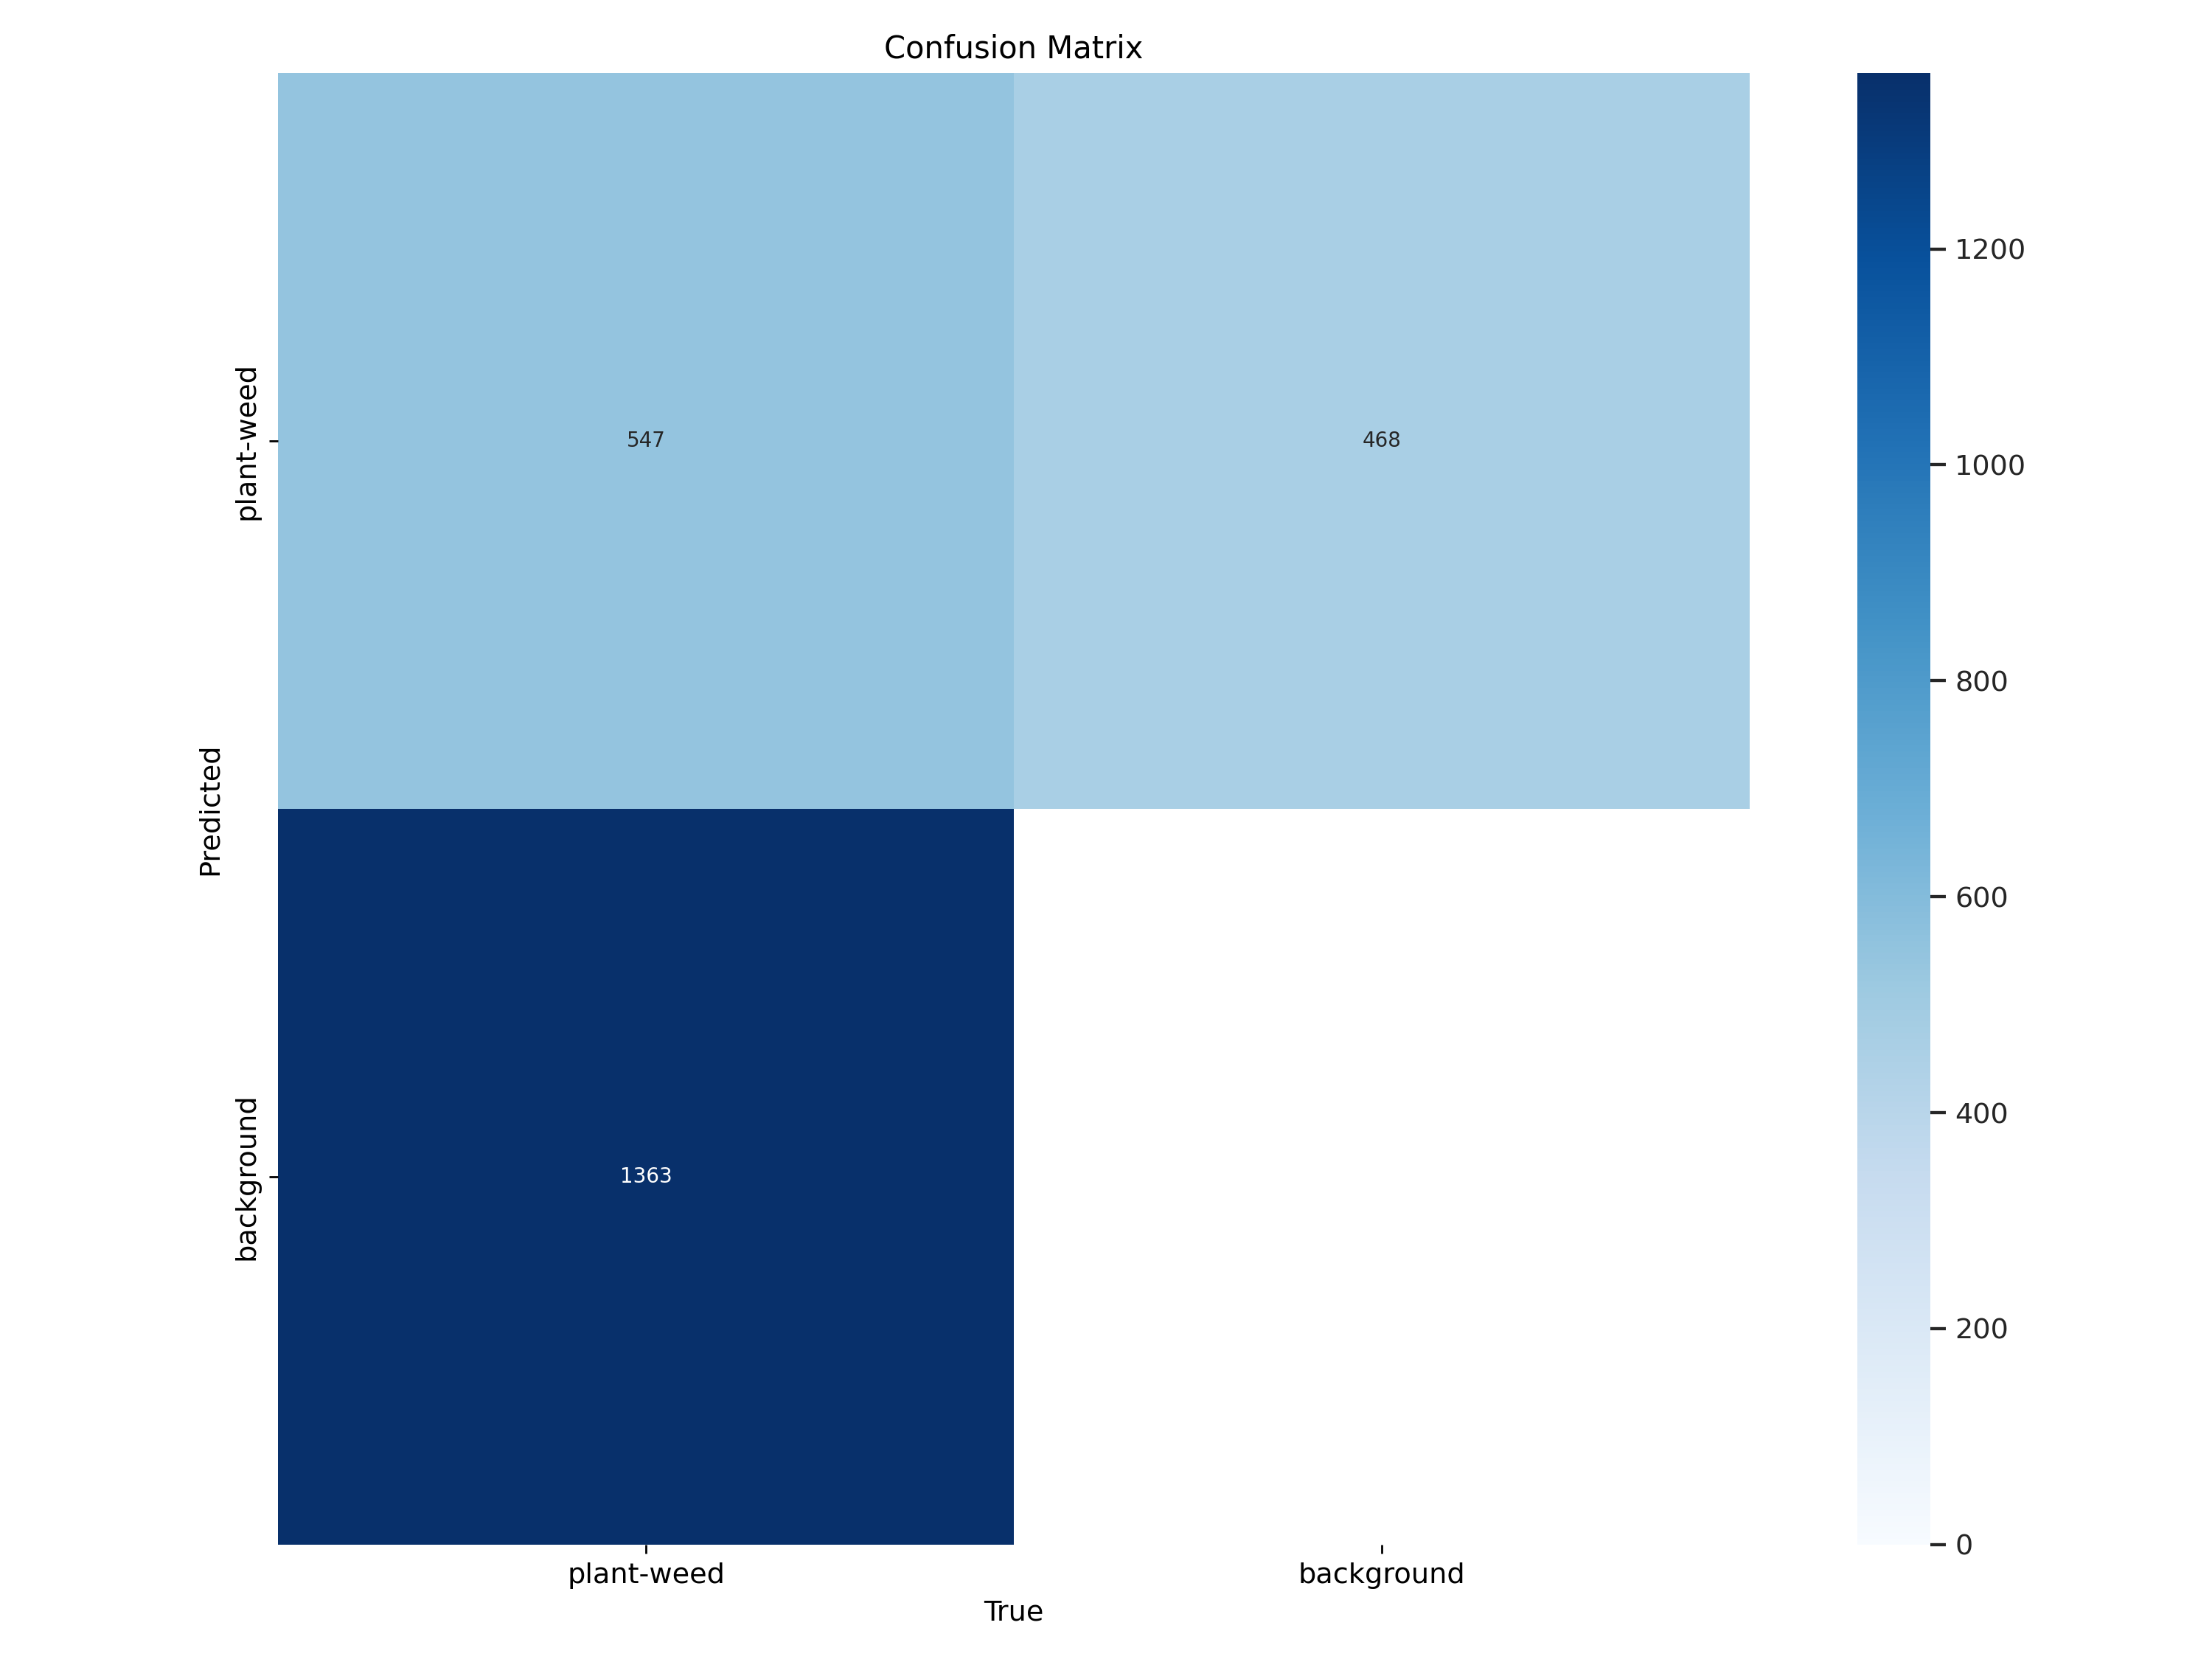

In [12]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

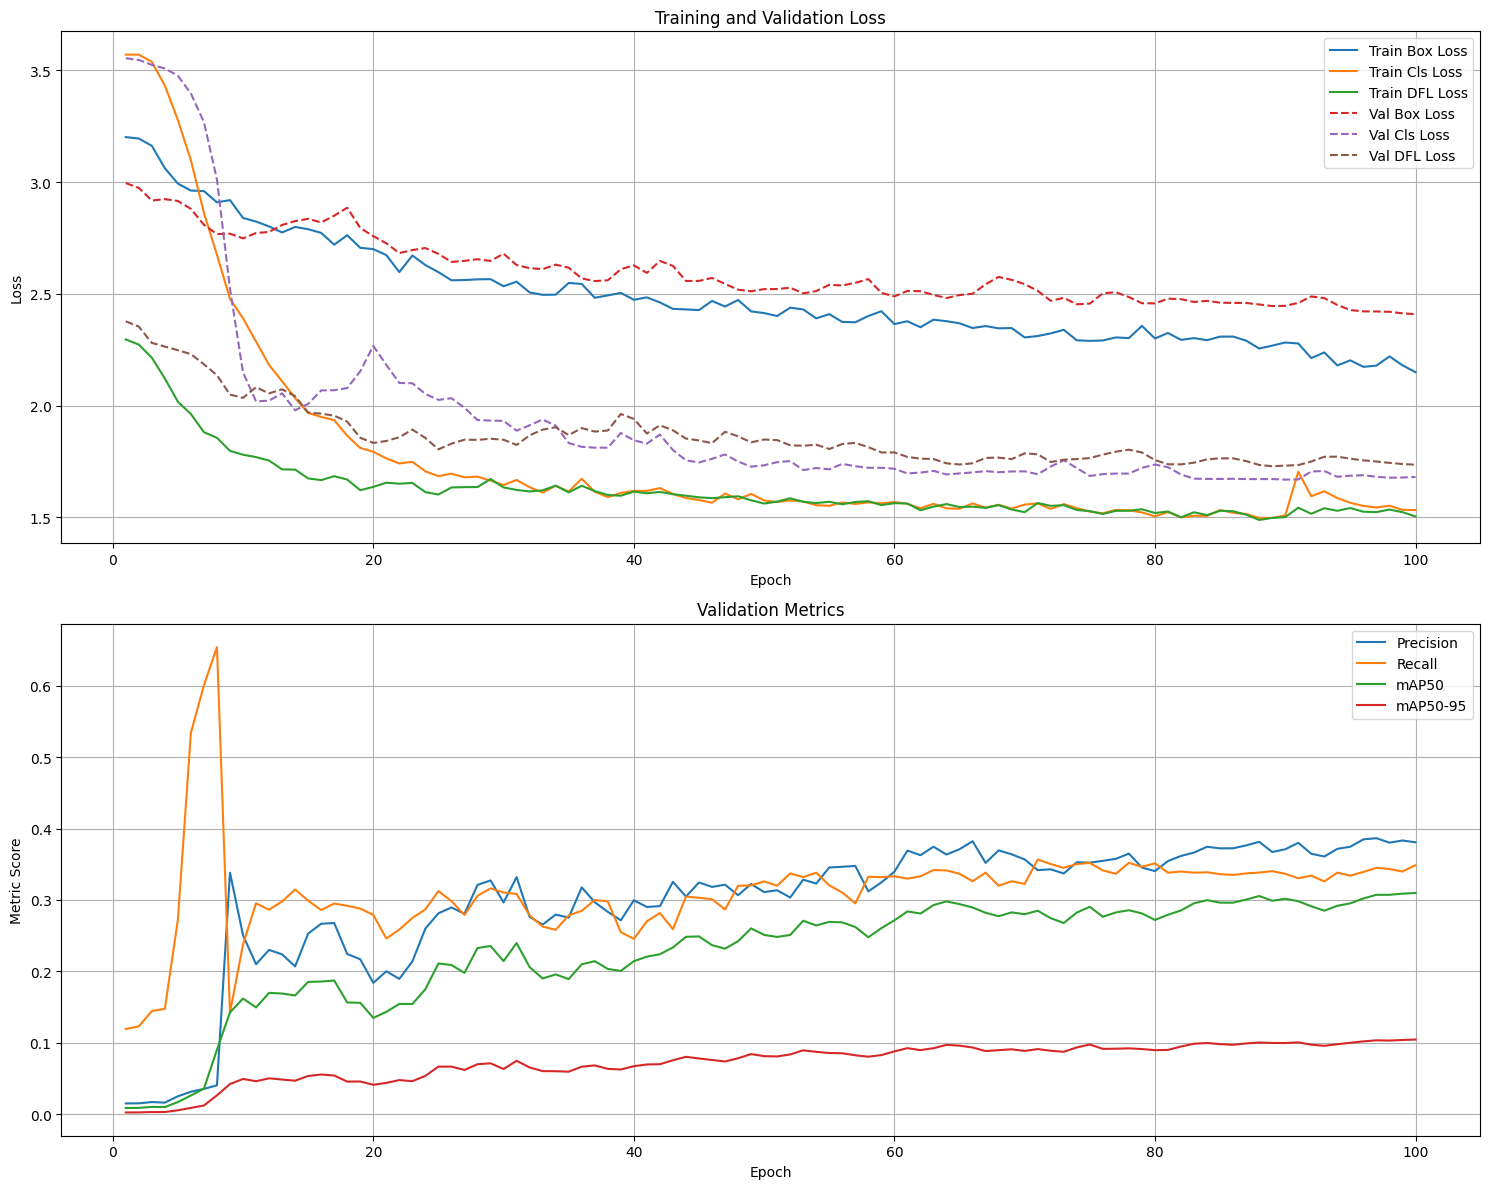

In [13]:
graph_training_metrics(df1, graph="full")

In [14]:
graph_LrLoss_3D(df1)

Validation set


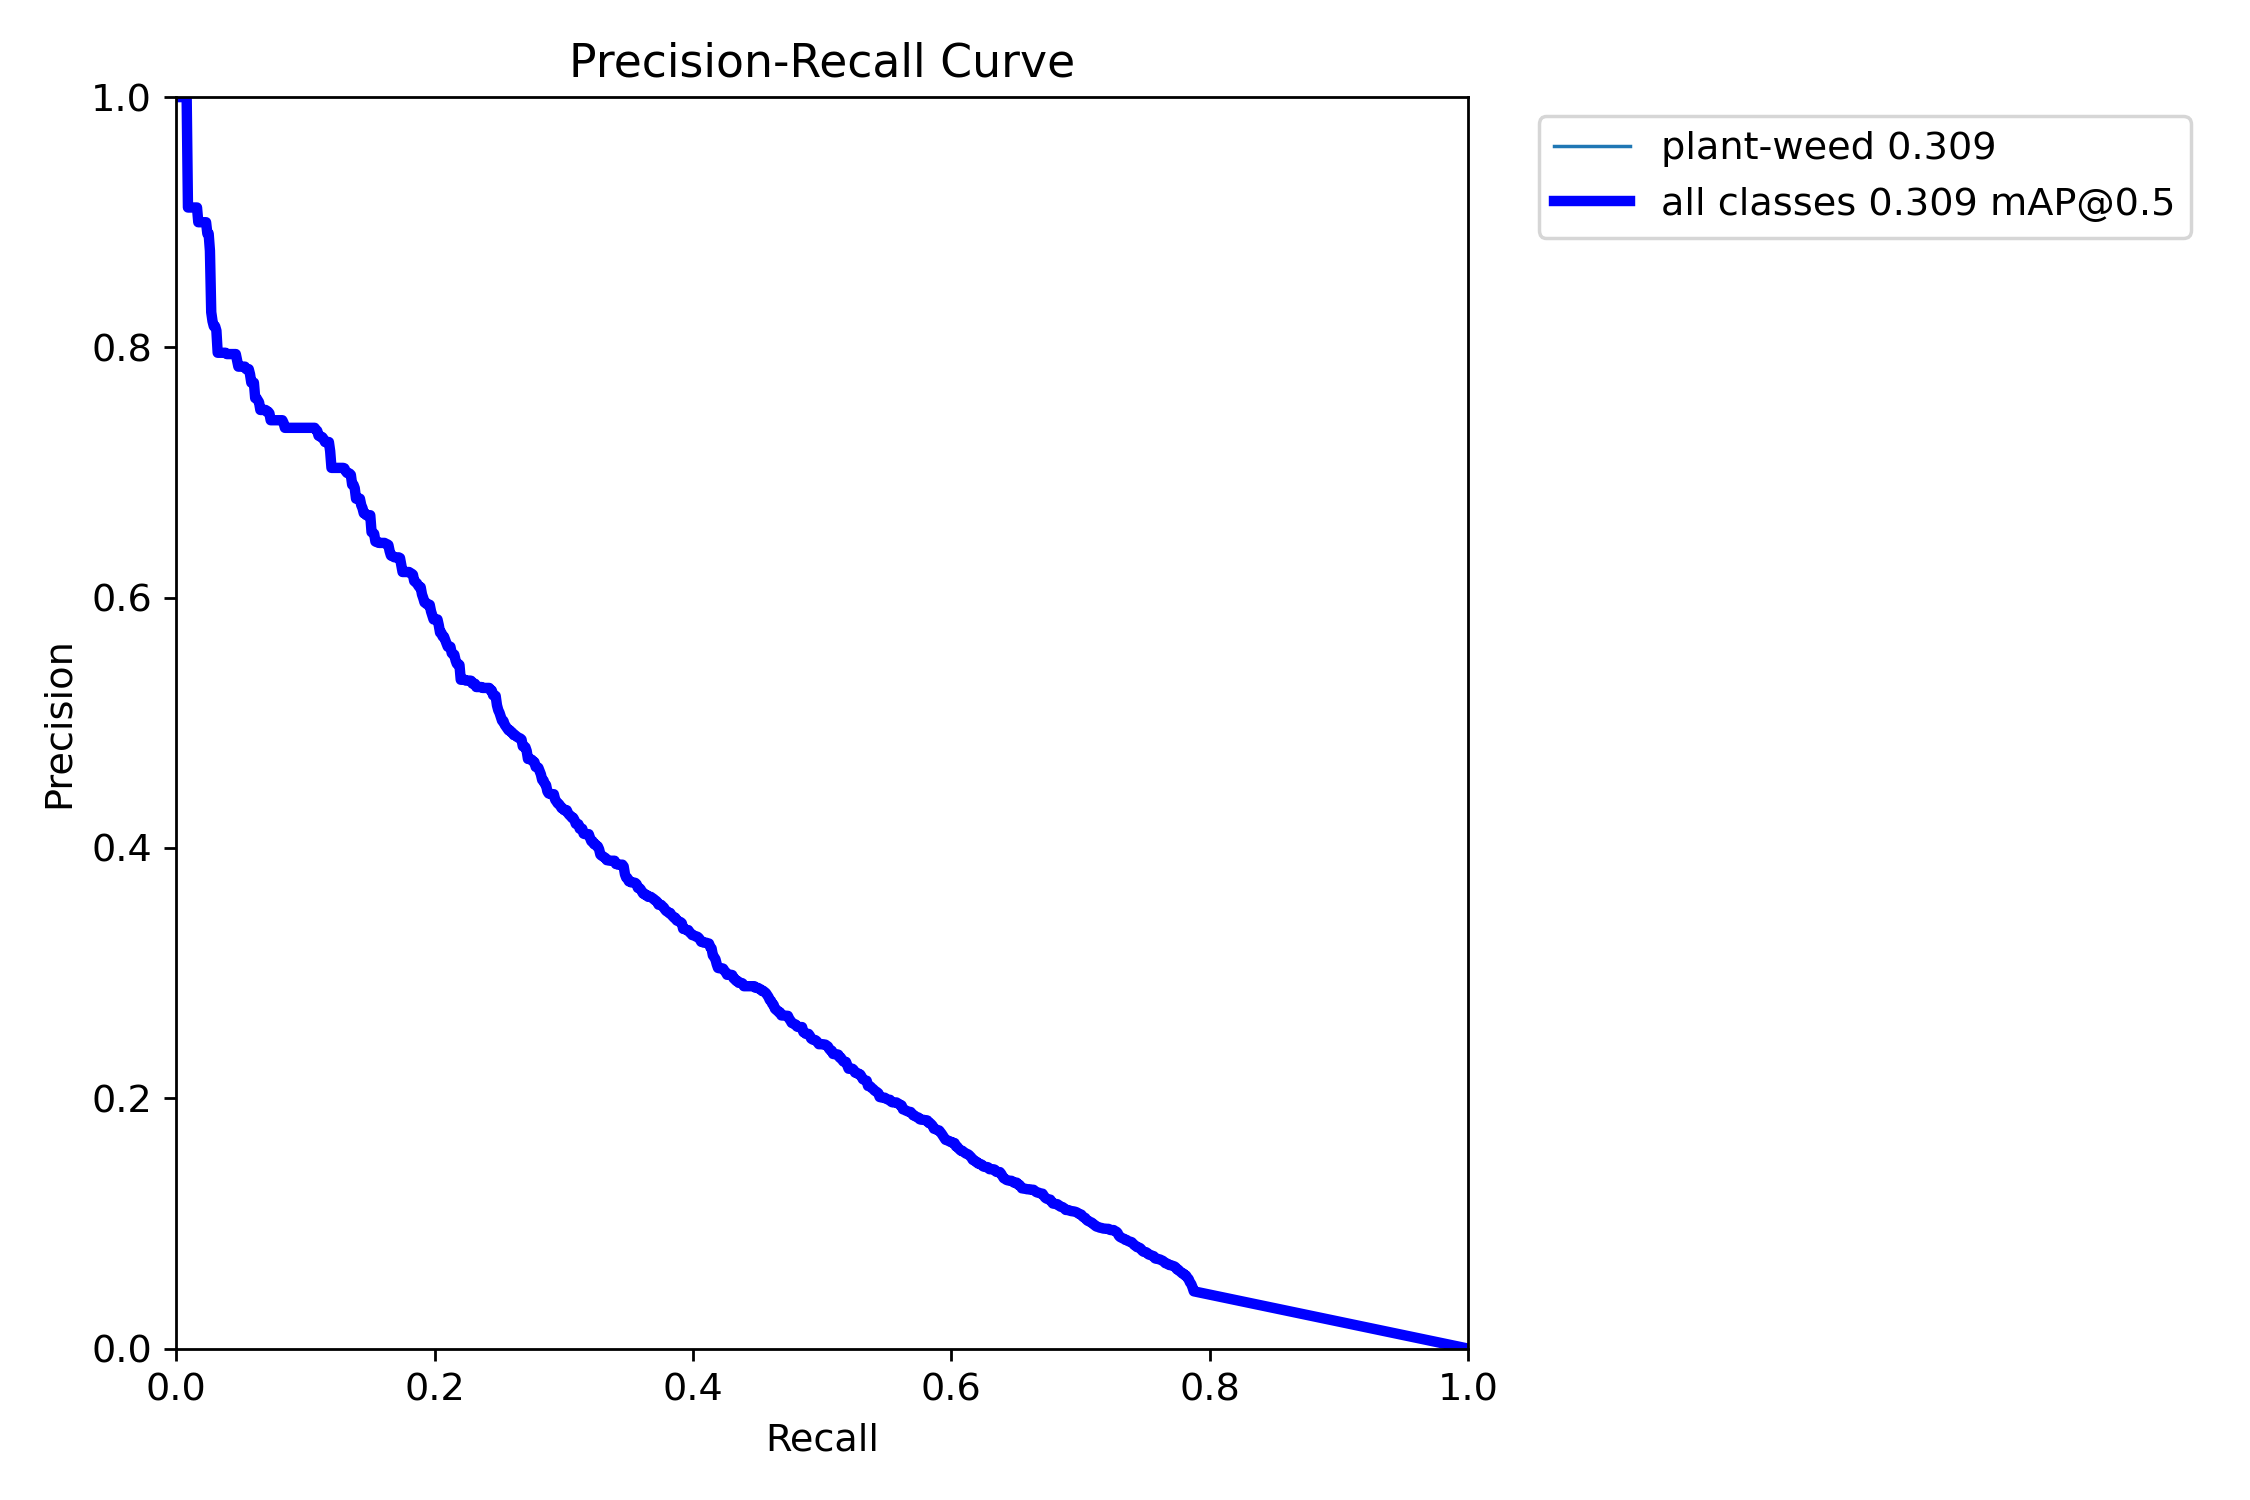

In [15]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

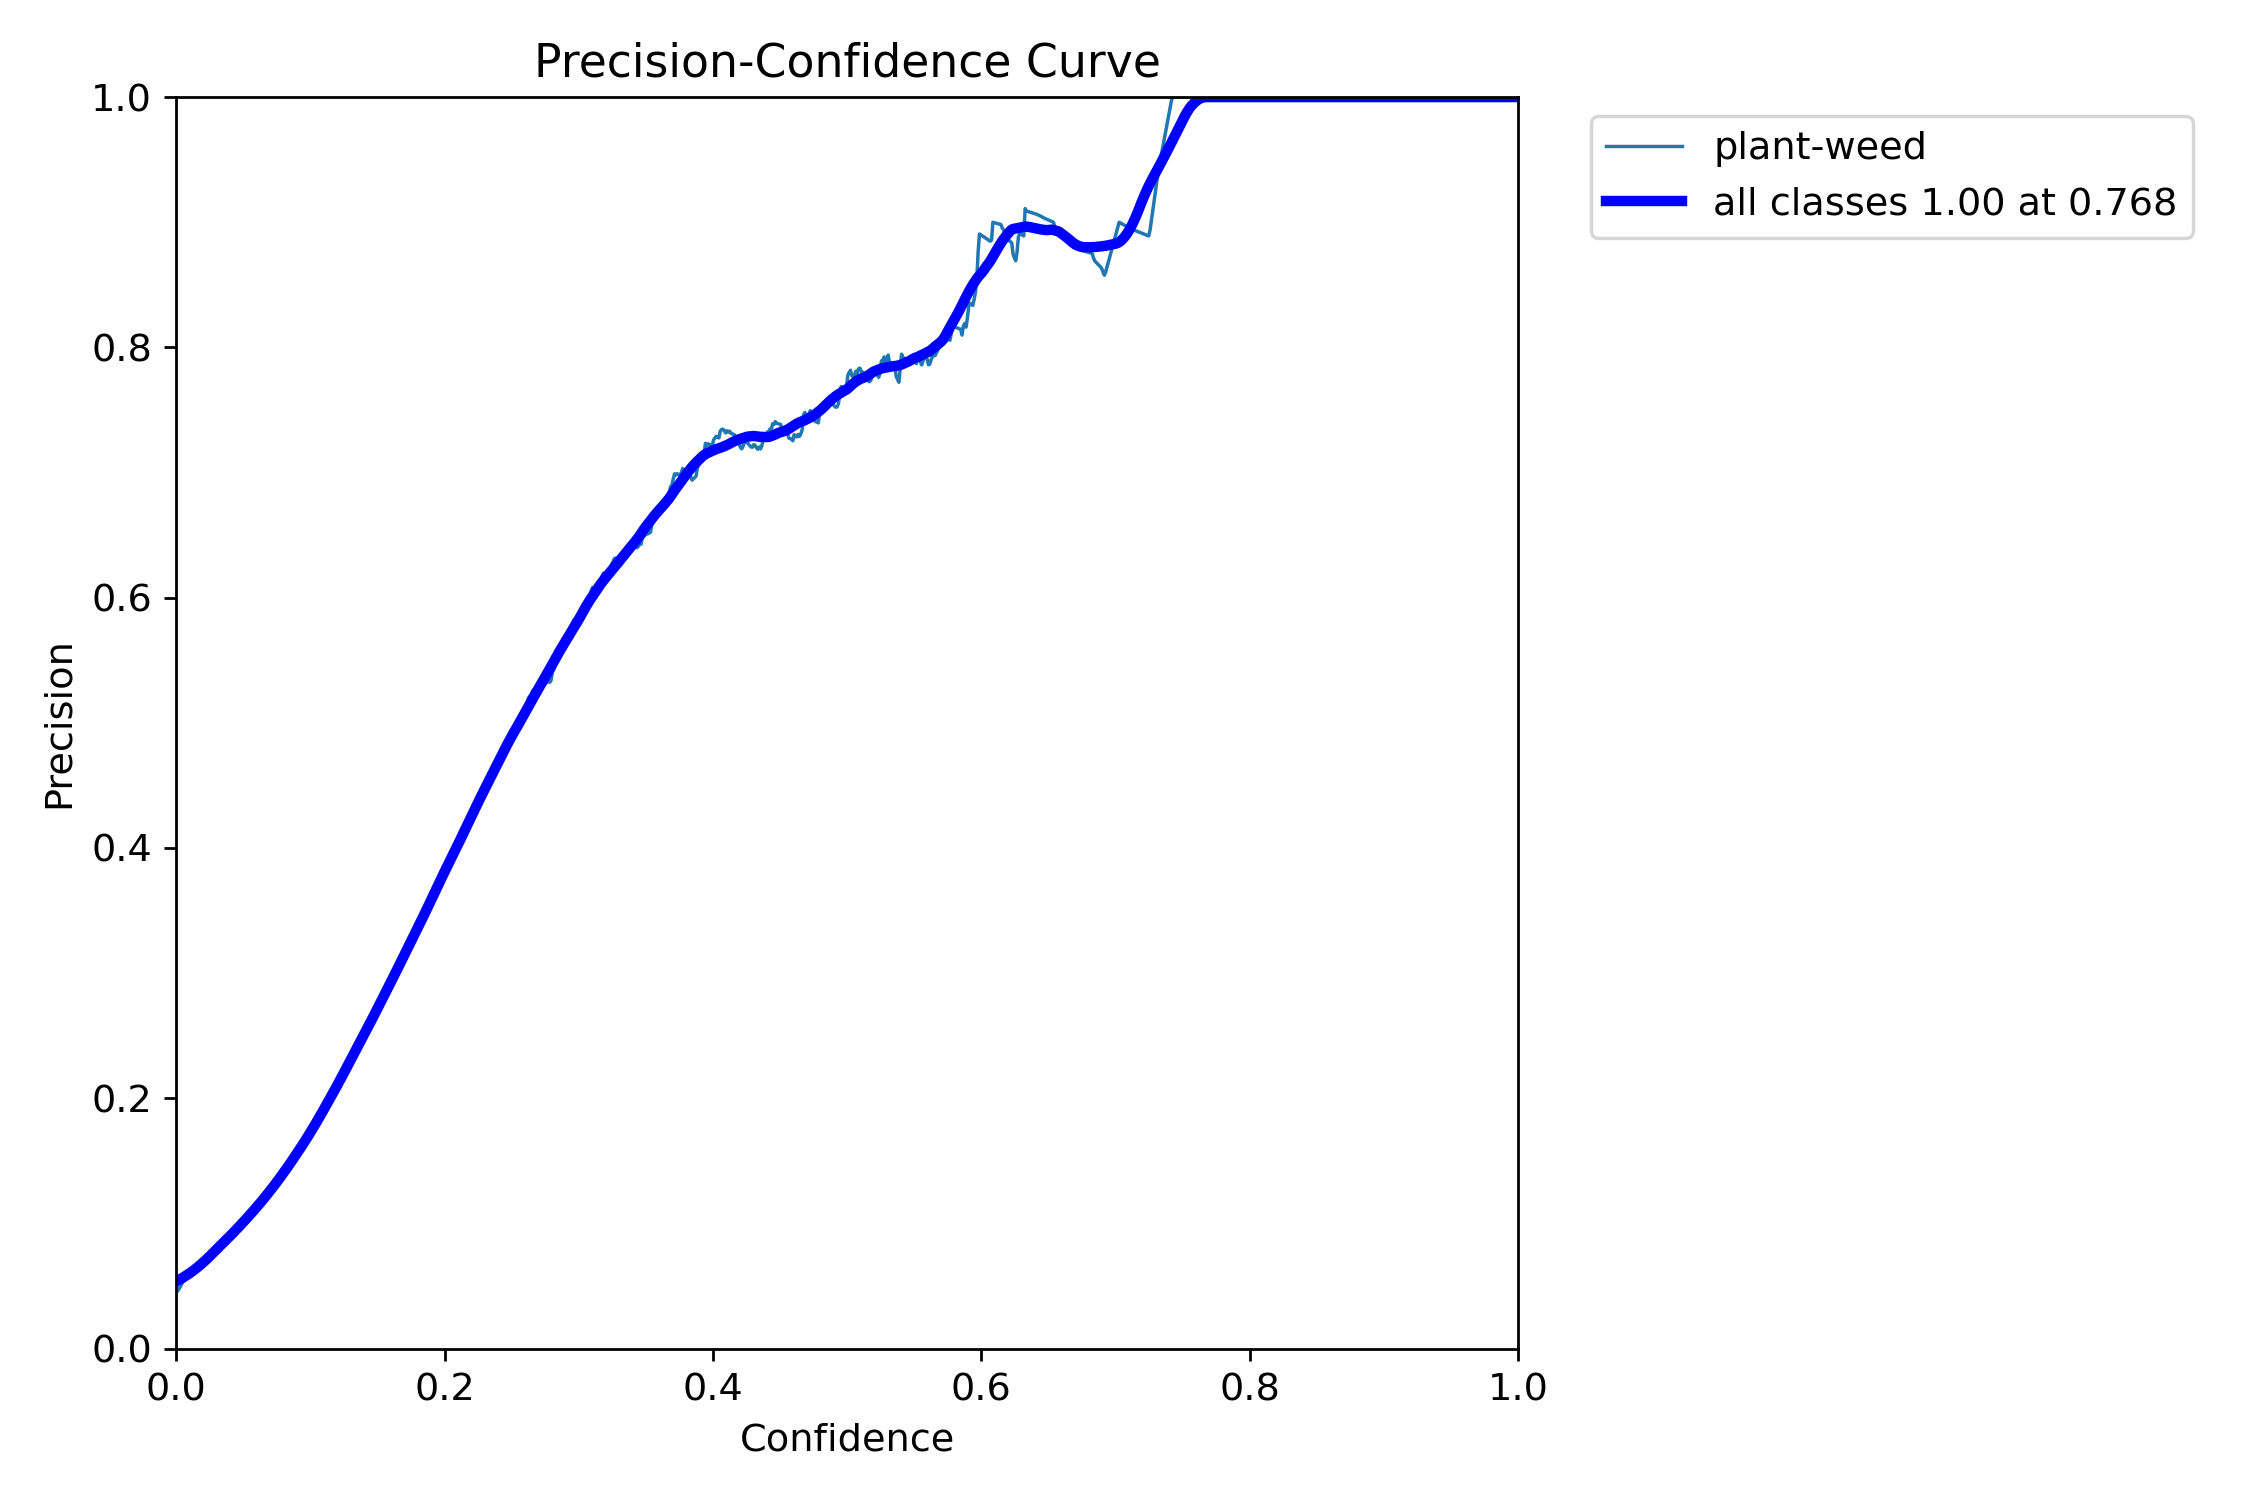

In [16]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

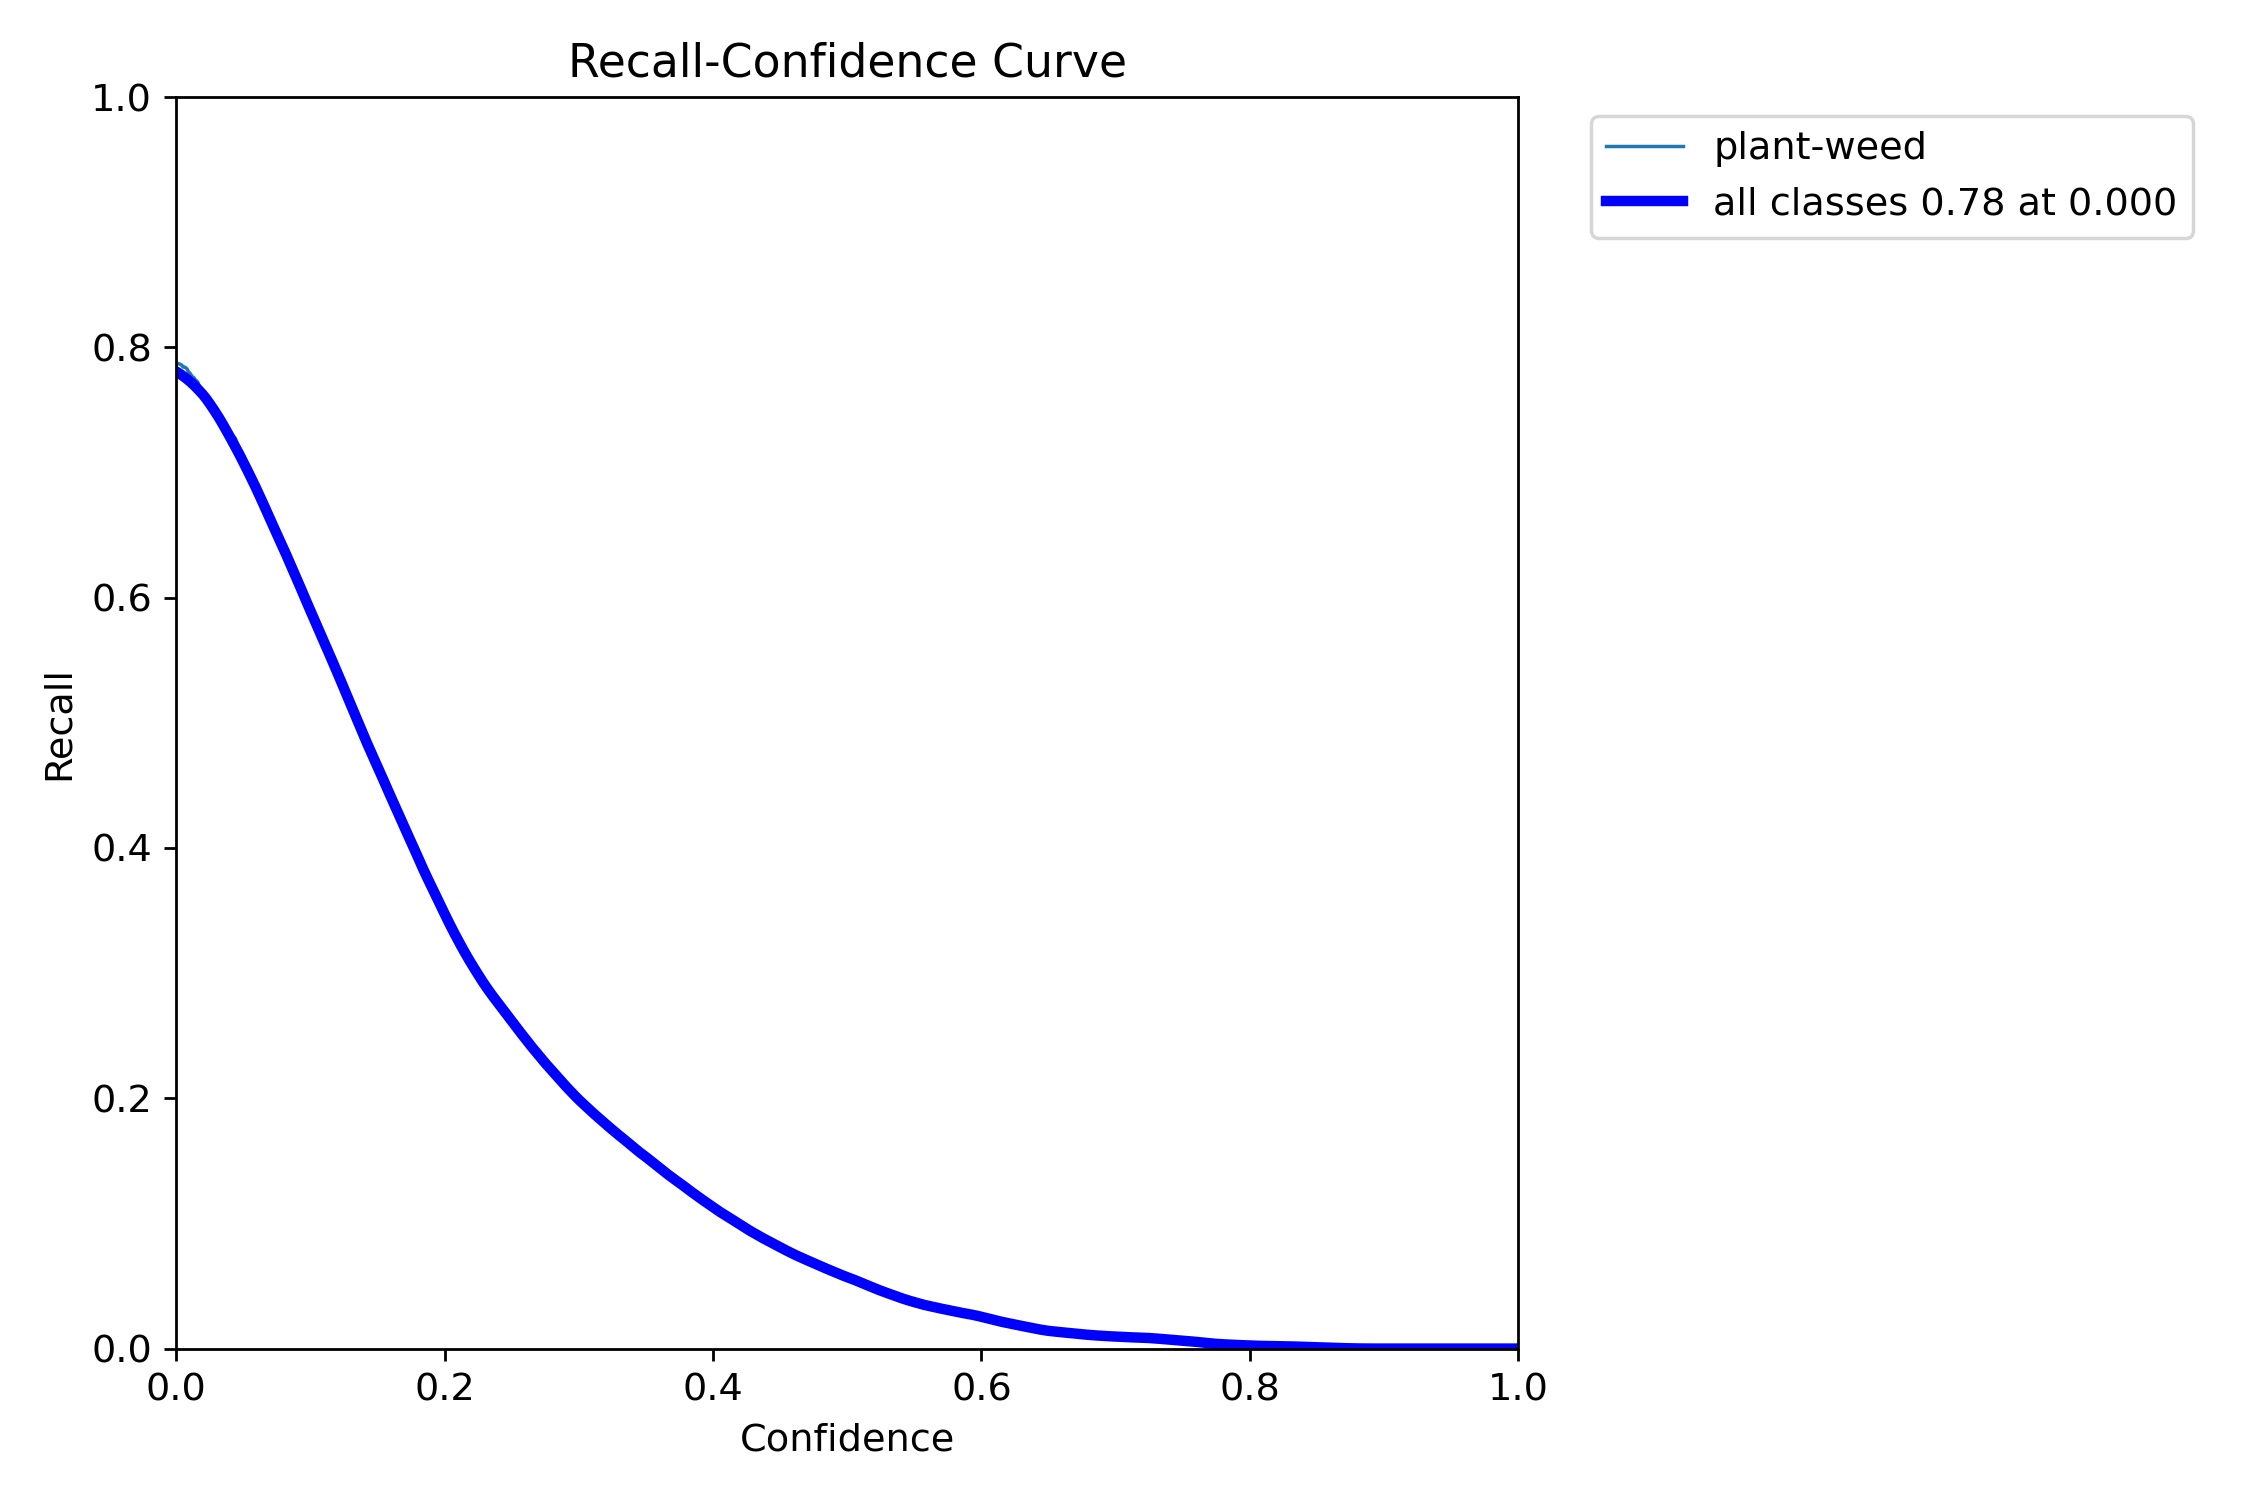

In [17]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

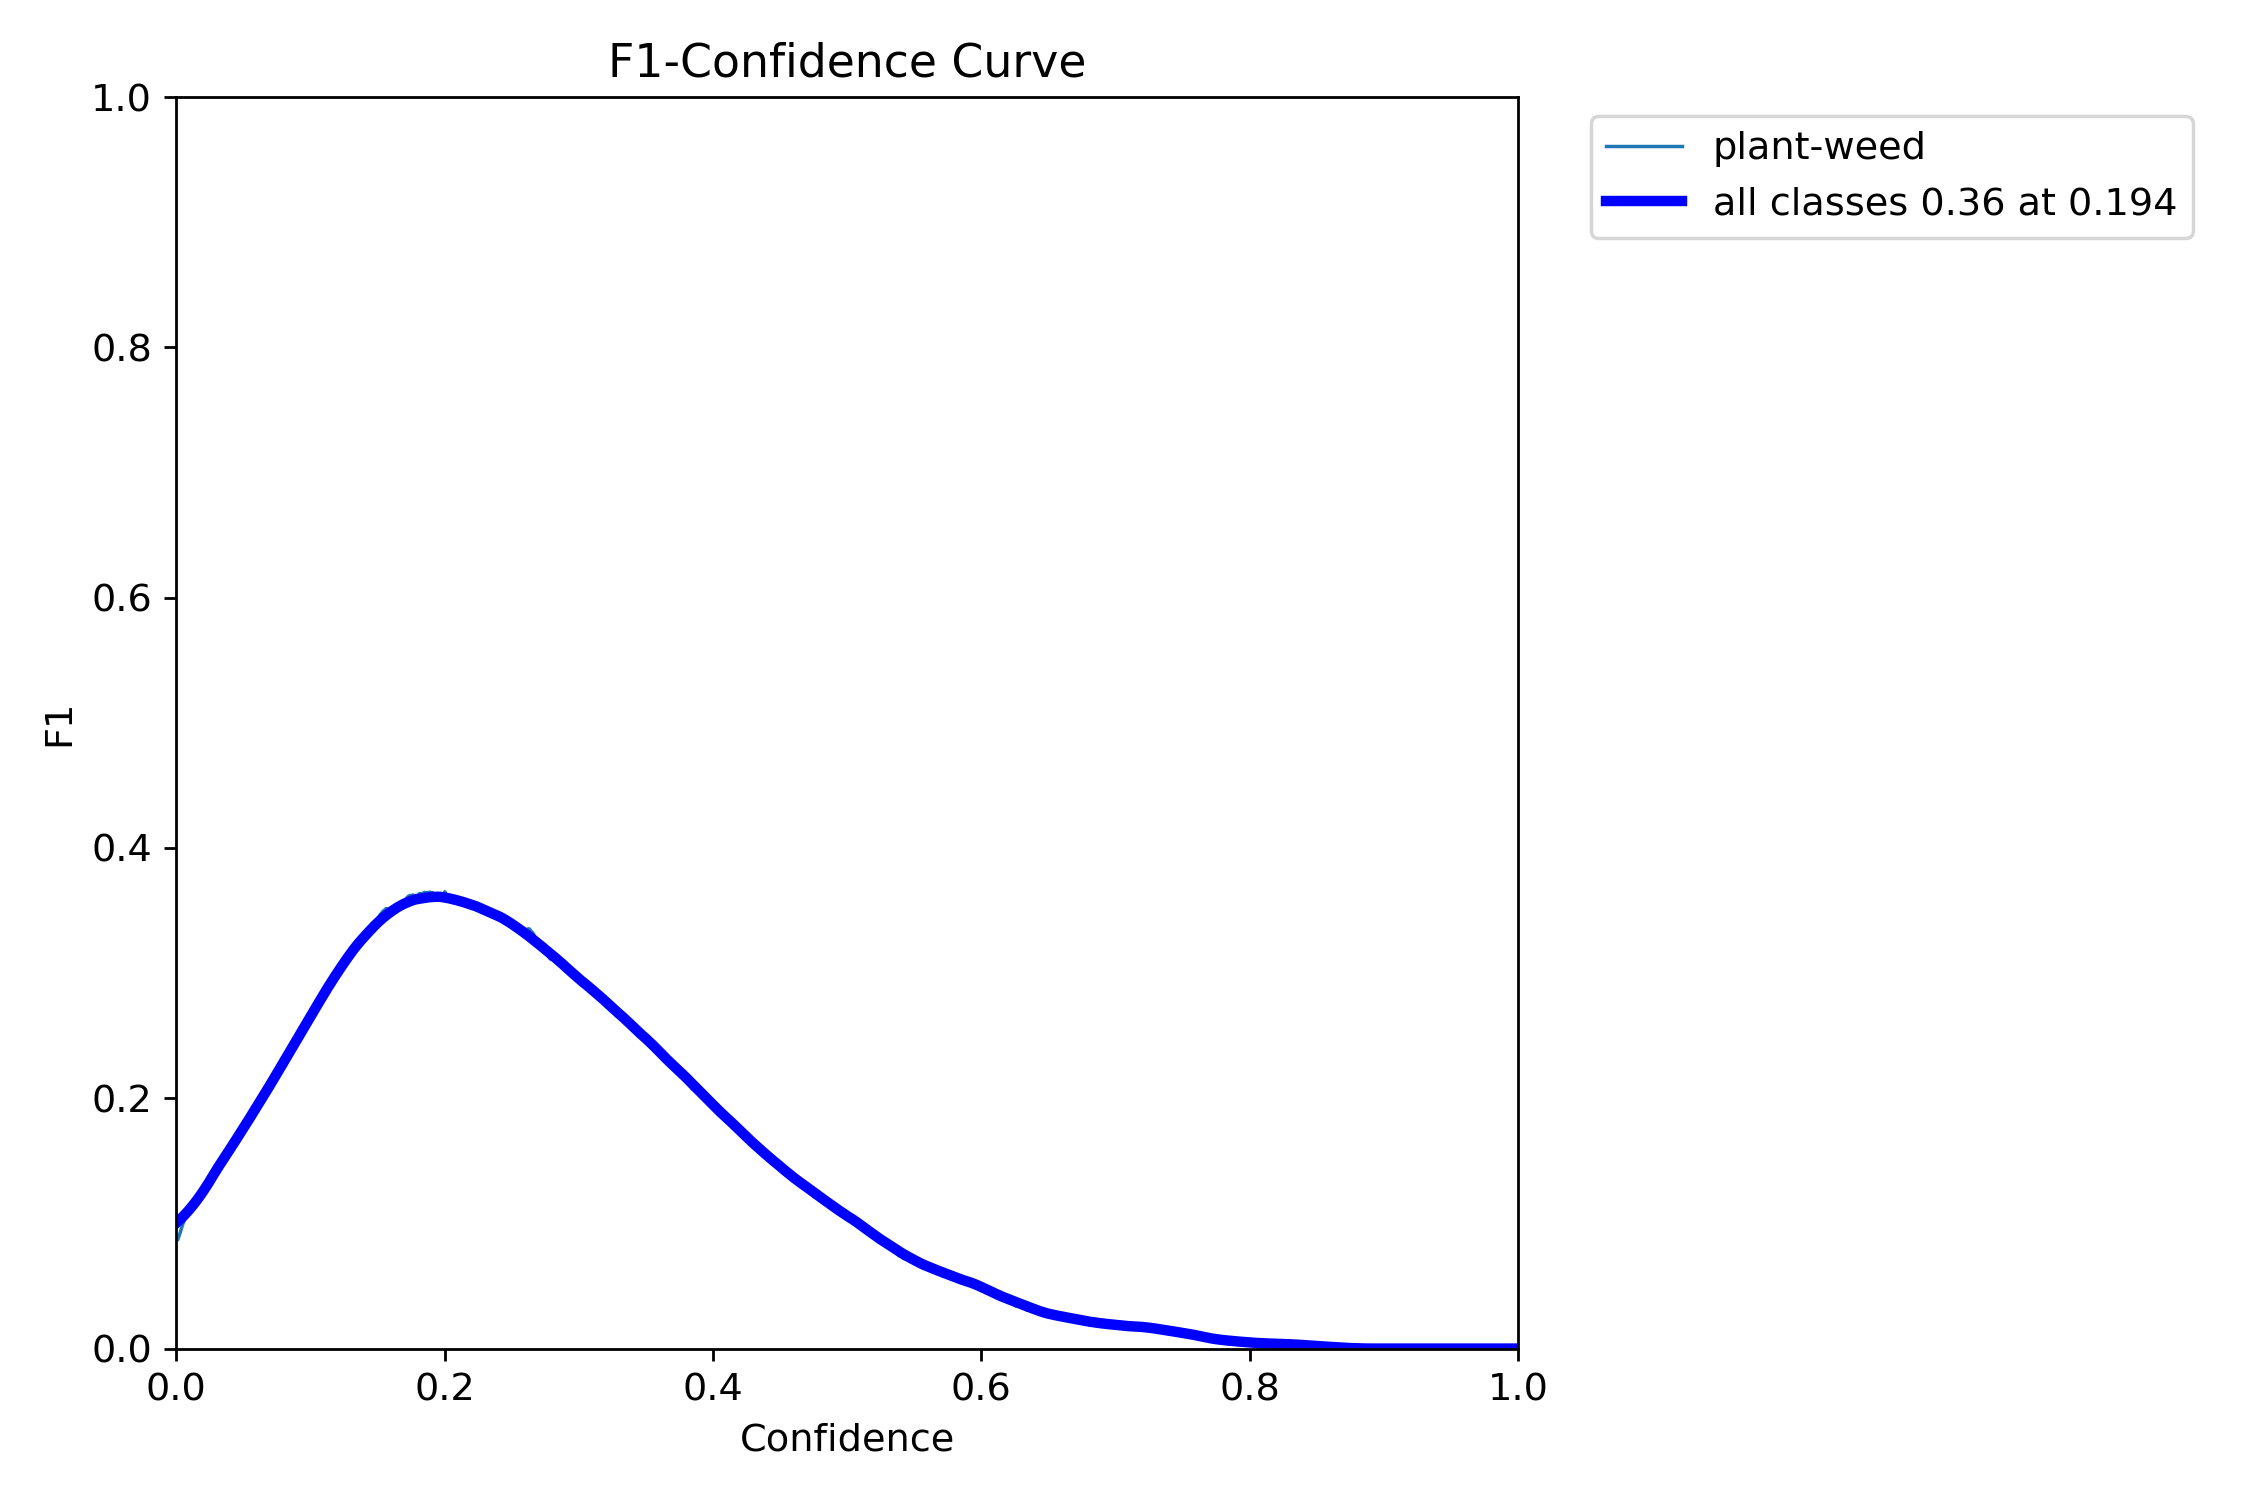

In [18]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

El valor de confianza que optimiza la precisión y recall es 0.231. En la mayoría de los casos, una mayor confianza es deseable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

## Experiment 11 *(full dataset)*
### *3.5m + 5m | 60º | small + mid + large*

In [21]:
folder = "train2/"

In [22]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df2.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,670.133,1.83913,1.32249,1.35235,0.41652,0.34298,0.30135,0.10019,2.53732,1.69104,1.63882,0.000119,0.000119,0.000119
96,97,677.604,1.83191,1.32175,1.34932,0.40599,0.34313,0.29275,0.09636,2.55852,1.72816,1.65561,0.000099,0.000099,0.000099
97,98,683.483,1.82591,1.33651,1.35035,0.41137,0.34189,0.29351,0.09595,2.55604,1.72989,1.65319,0.000079,0.000079,0.000079
98,99,690.833,1.82409,1.32071,1.34828,0.40999,0.34407,0.29481,0.09632,2.55021,1.73672,1.64909,0.000060,0.000060,0.000060
99,100,696.921,1.83881,1.32639,1.35299,0.40663,0.34842,0.29848,0.09775,2.54782,1.74244,1.64794,0.000040,0.000040,0.000040


In [23]:
last_row = df2.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 11.615 min


### Graphs

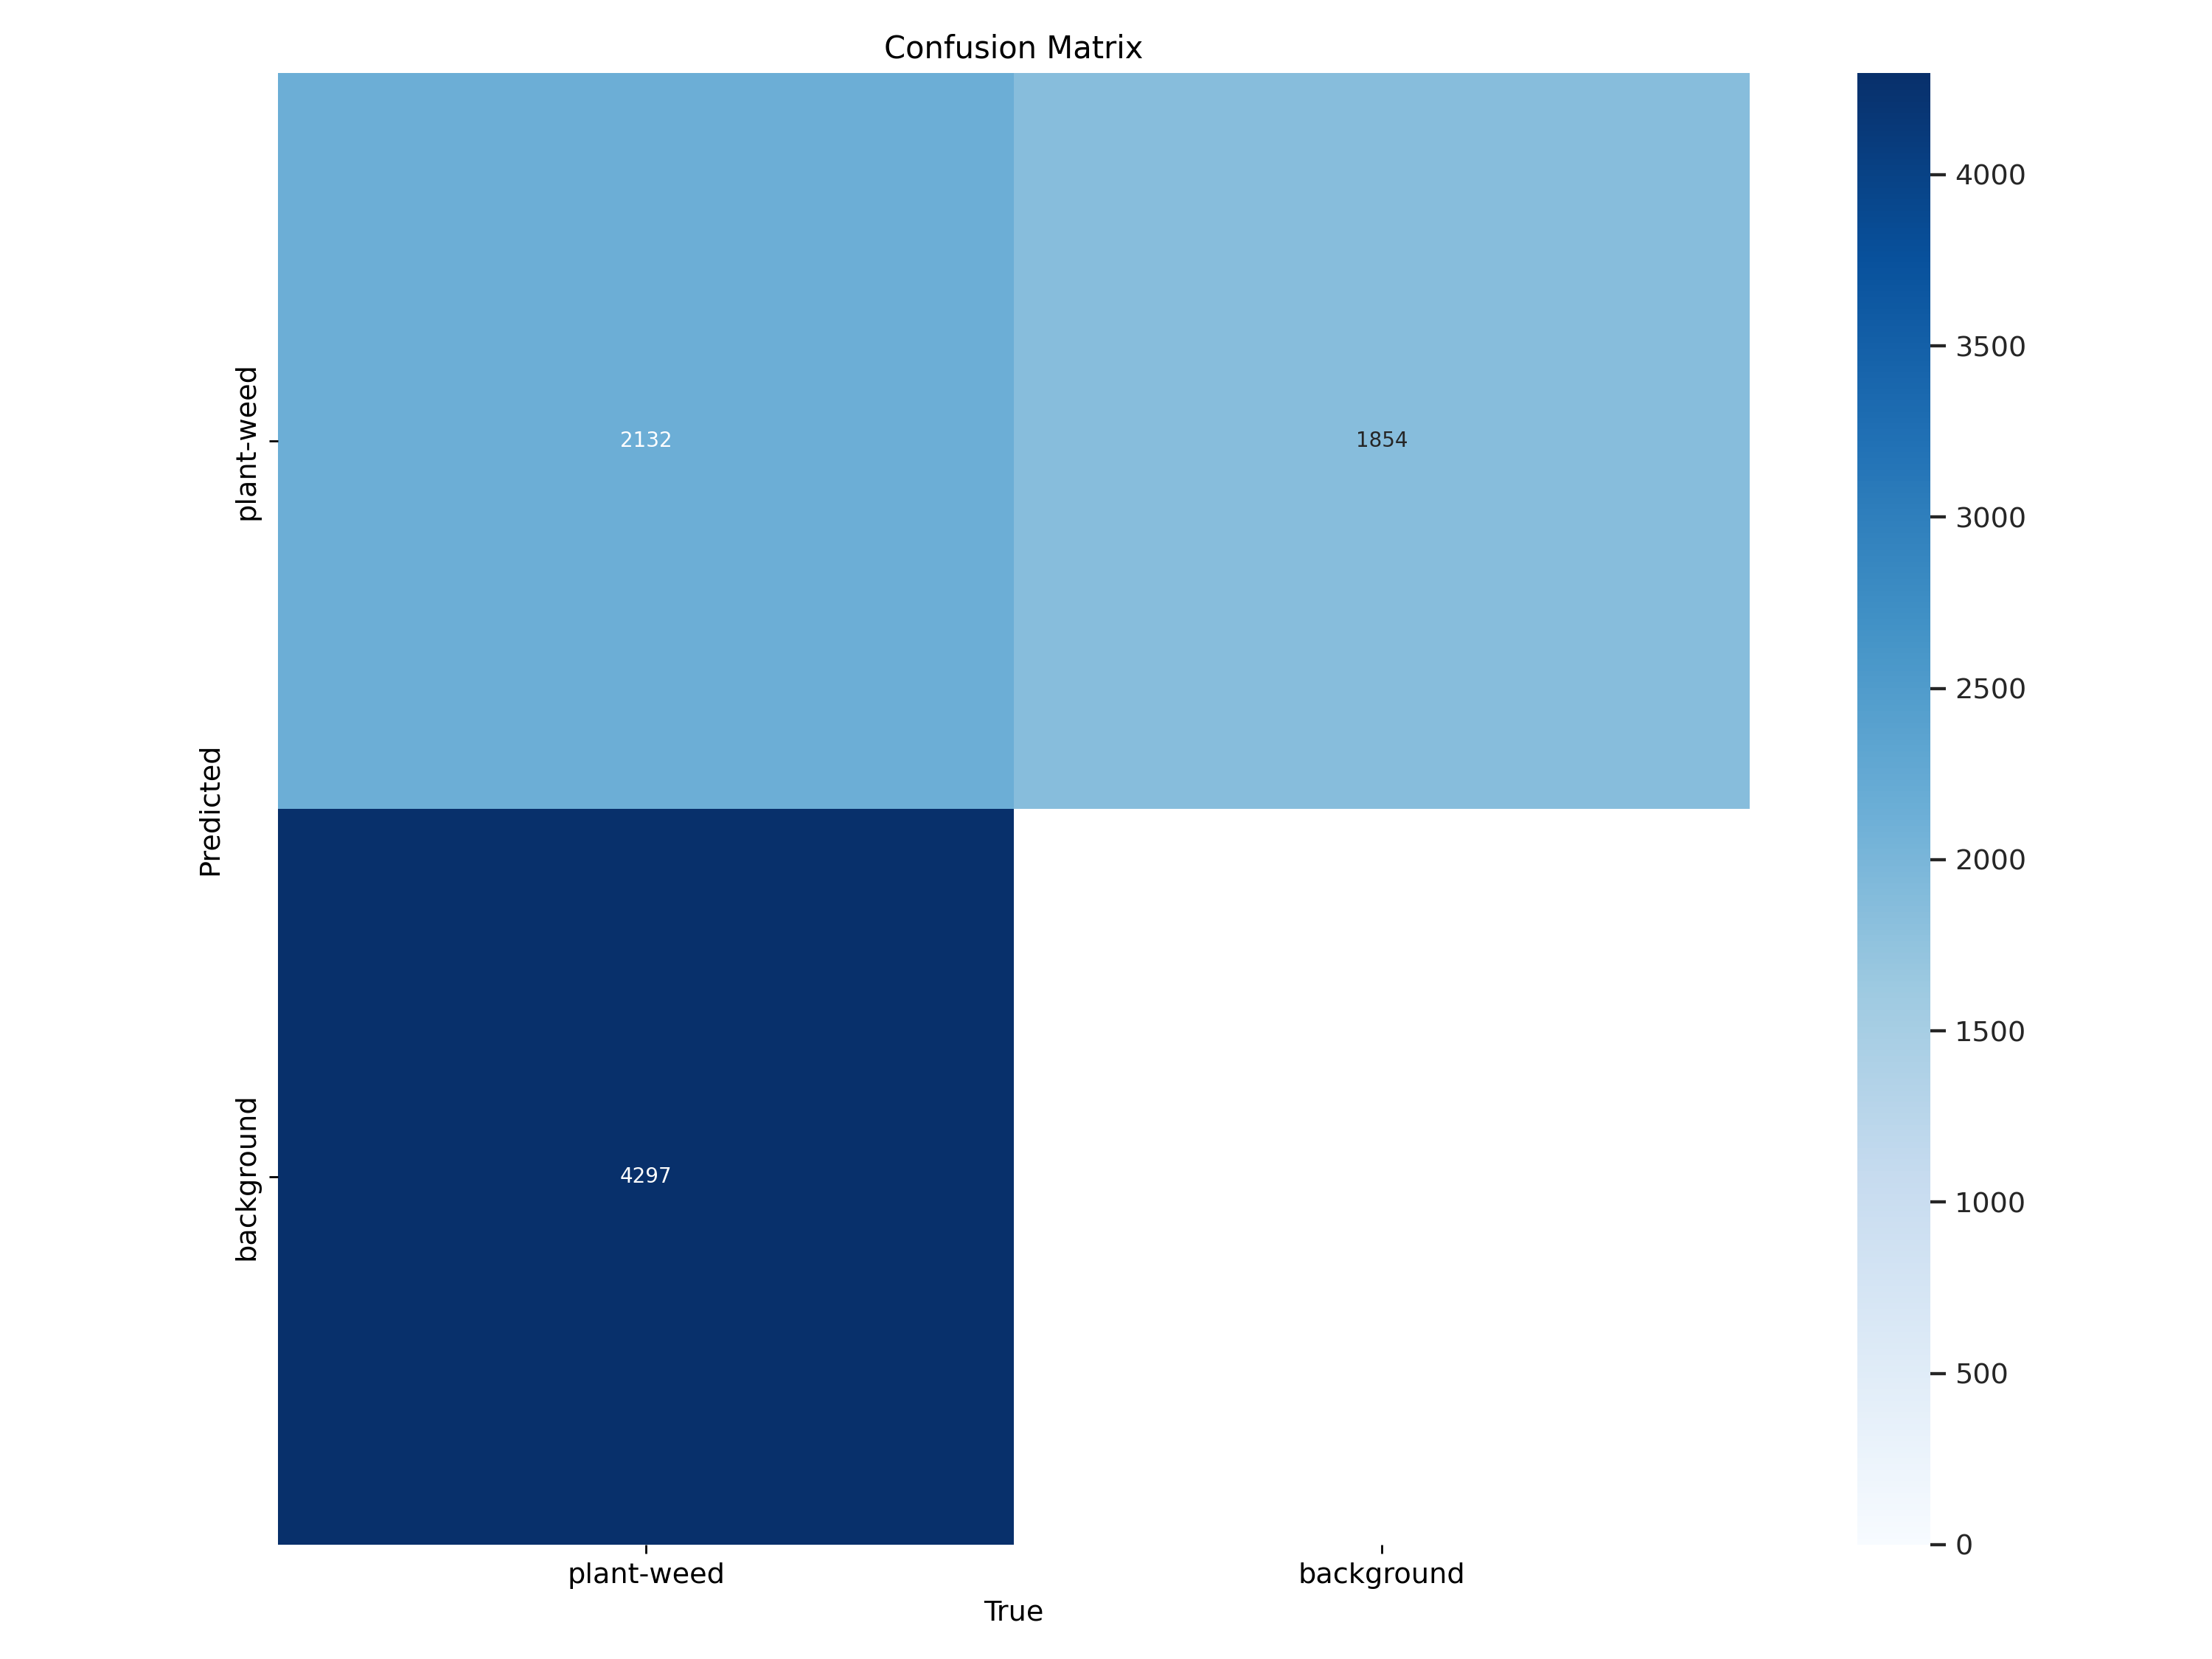

In [24]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

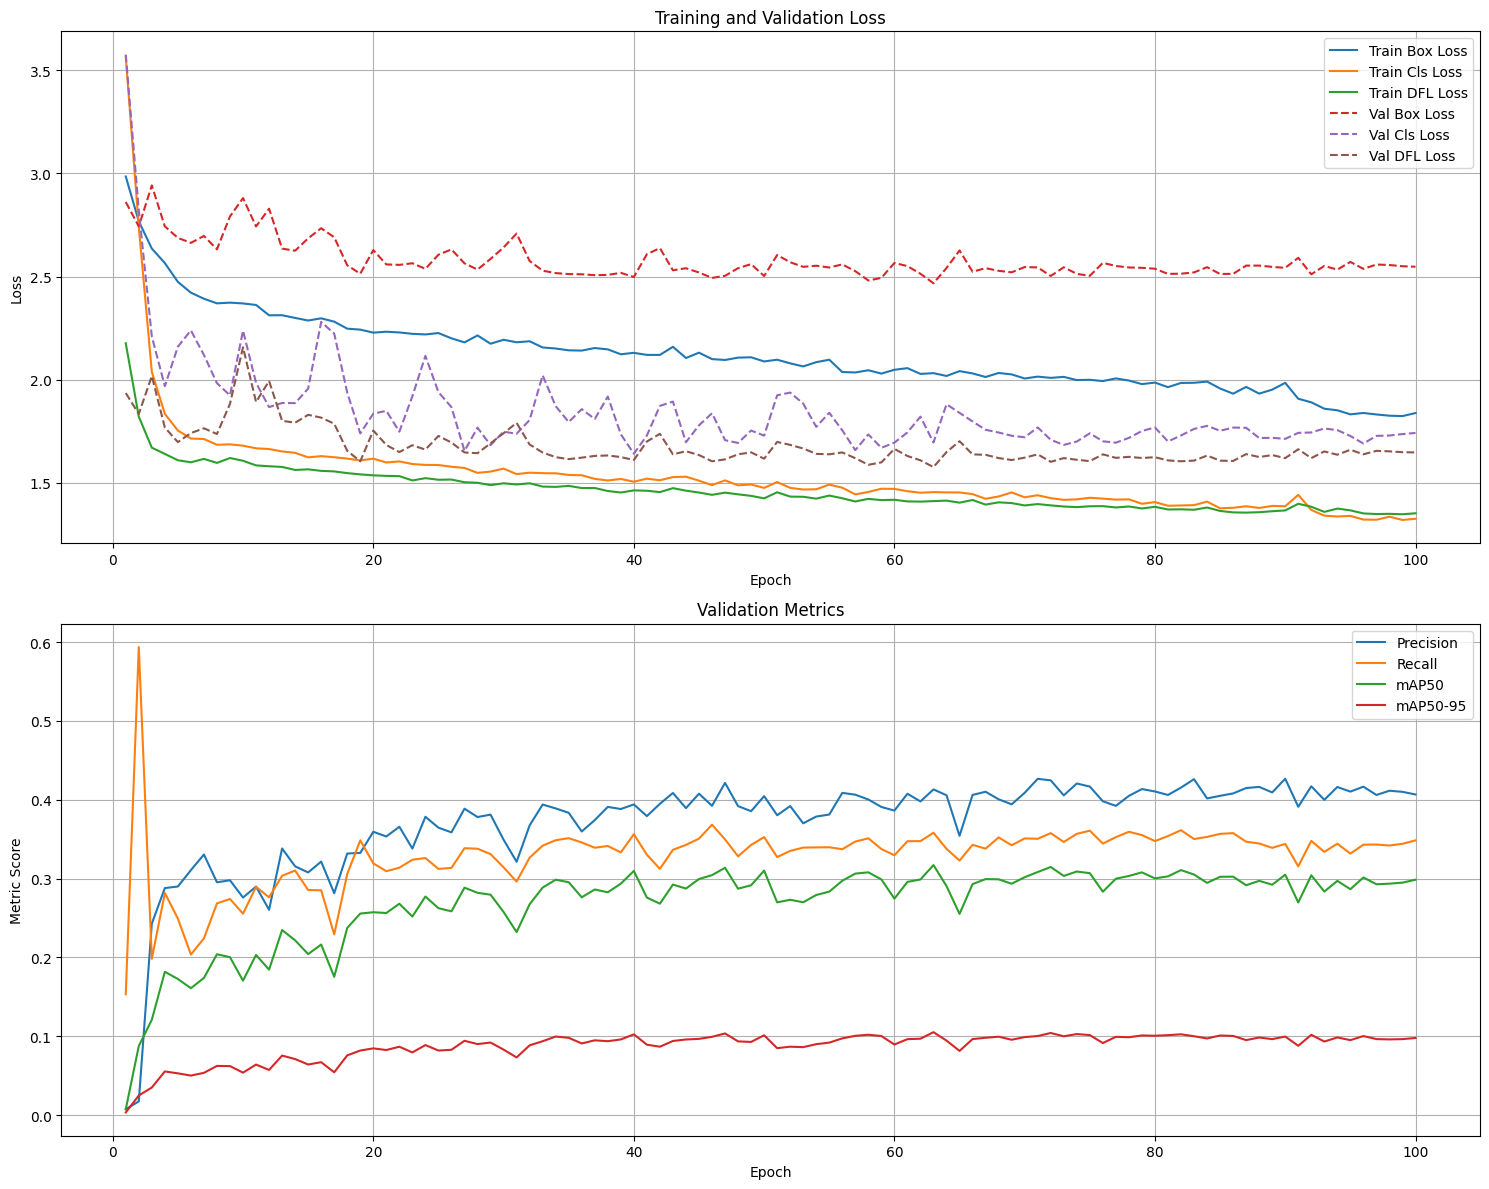

In [25]:
graph_training_metrics(df2, graph="full")

In [26]:
graph_LrLoss_3D(df2)

Validation set


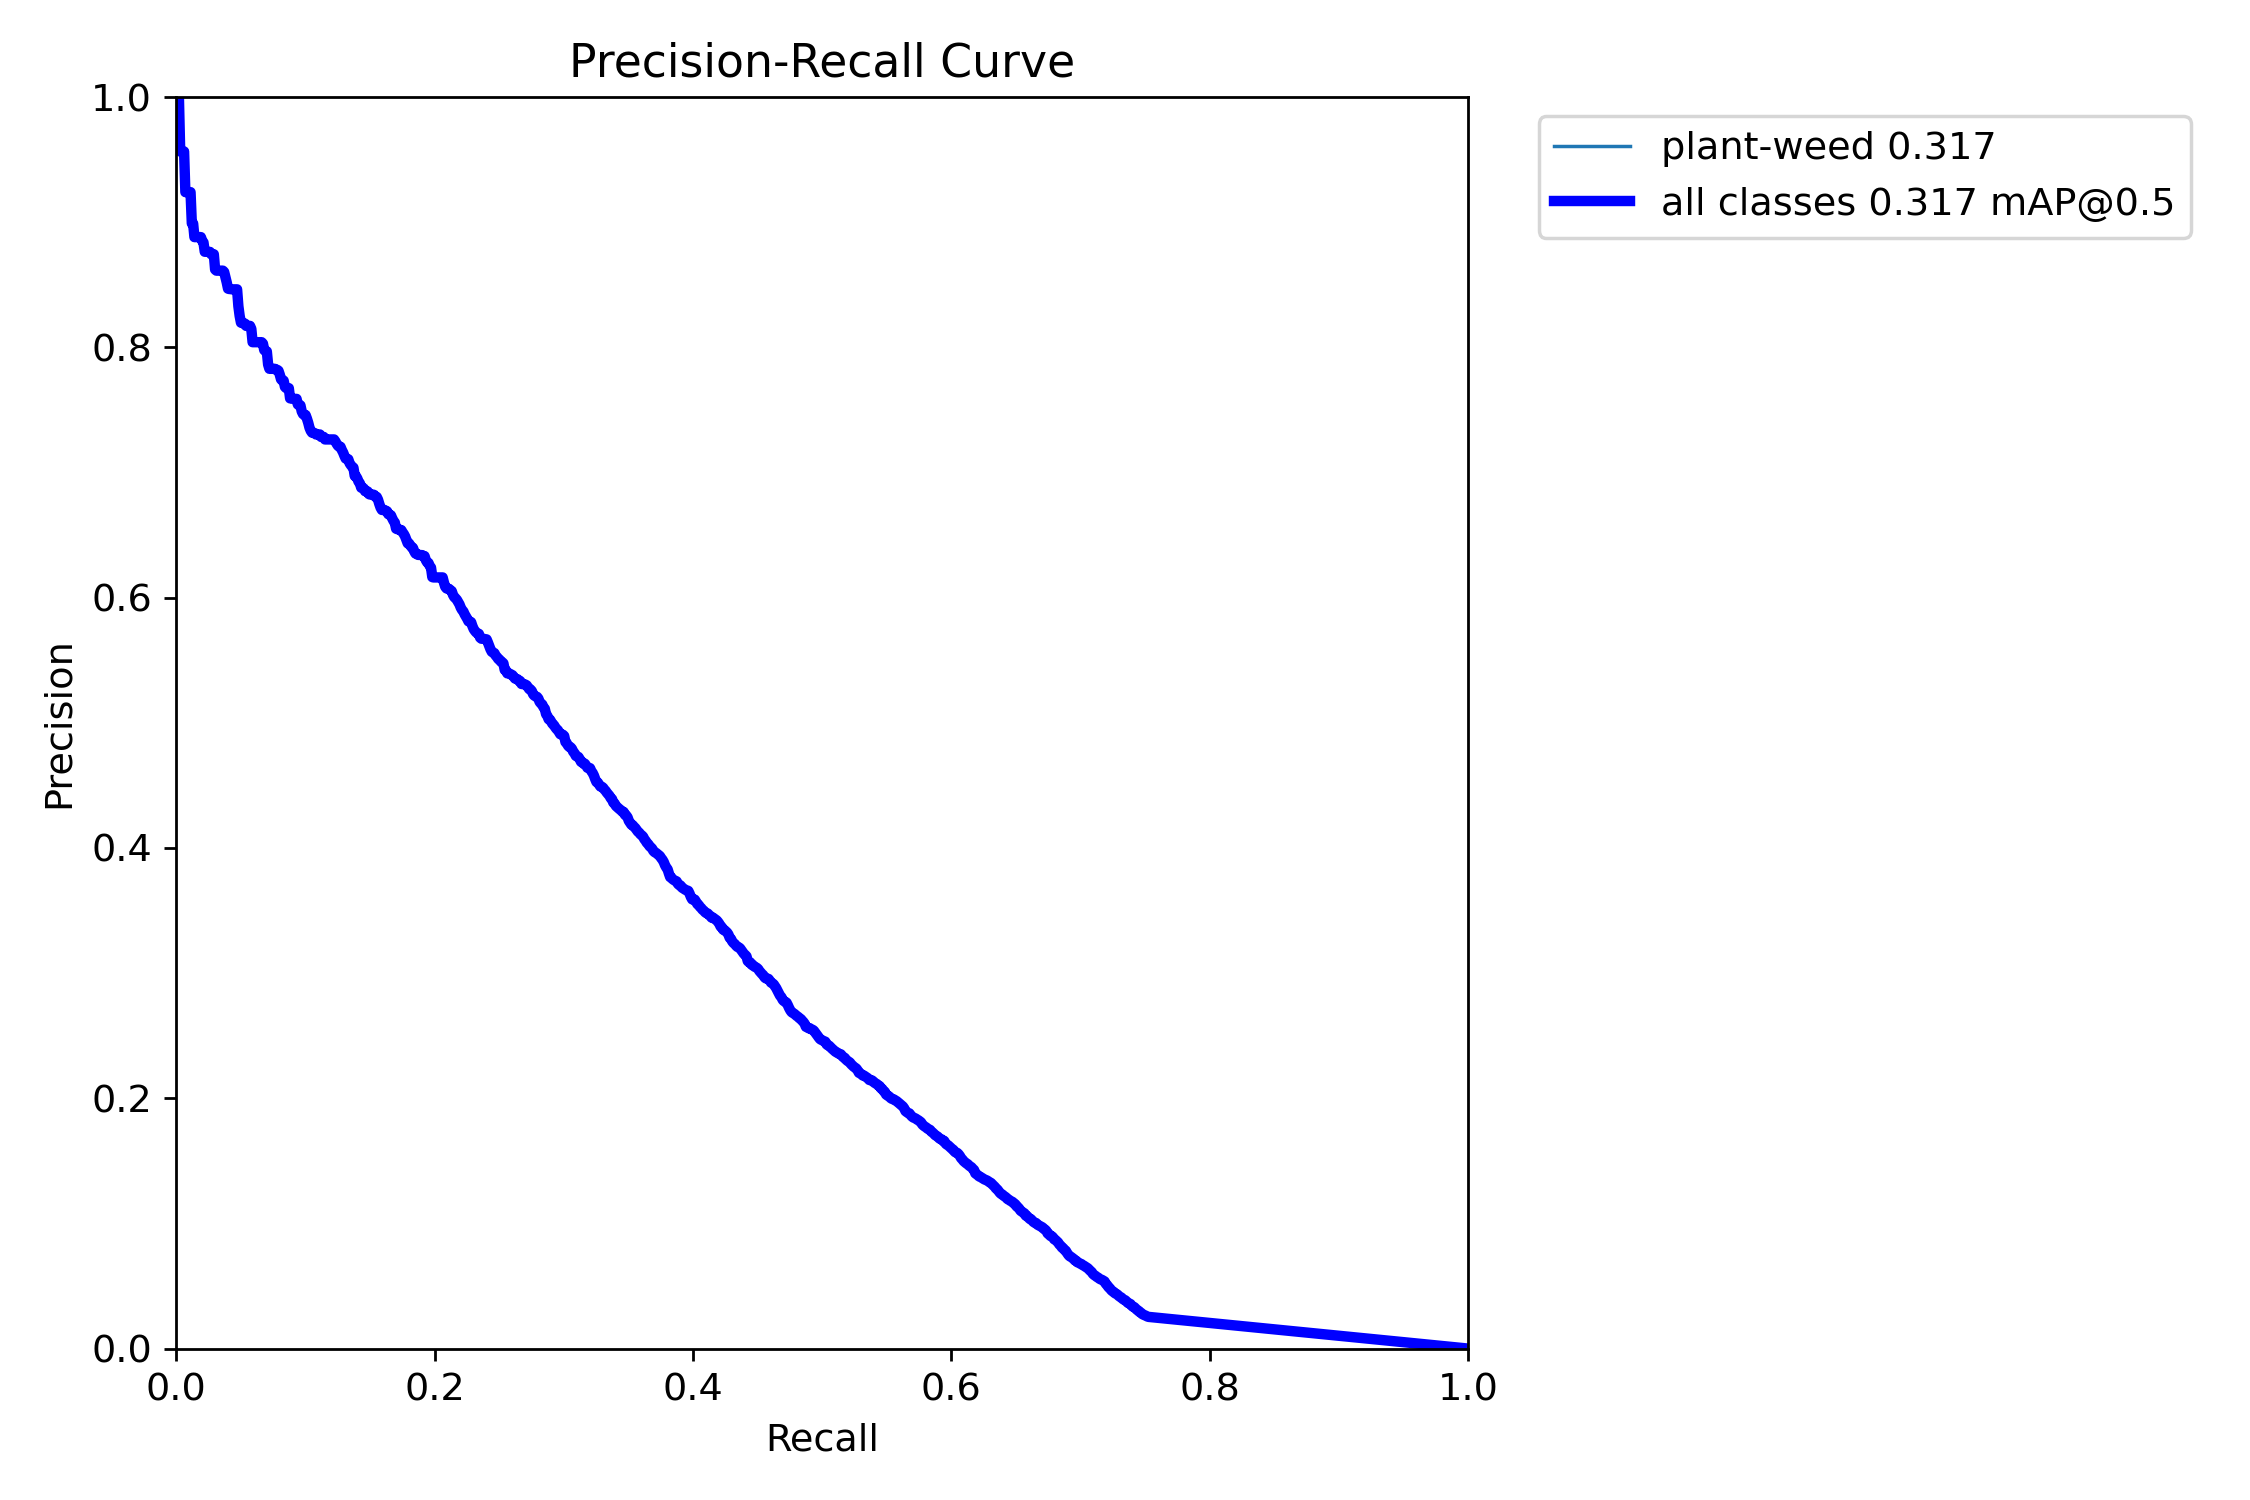

In [27]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

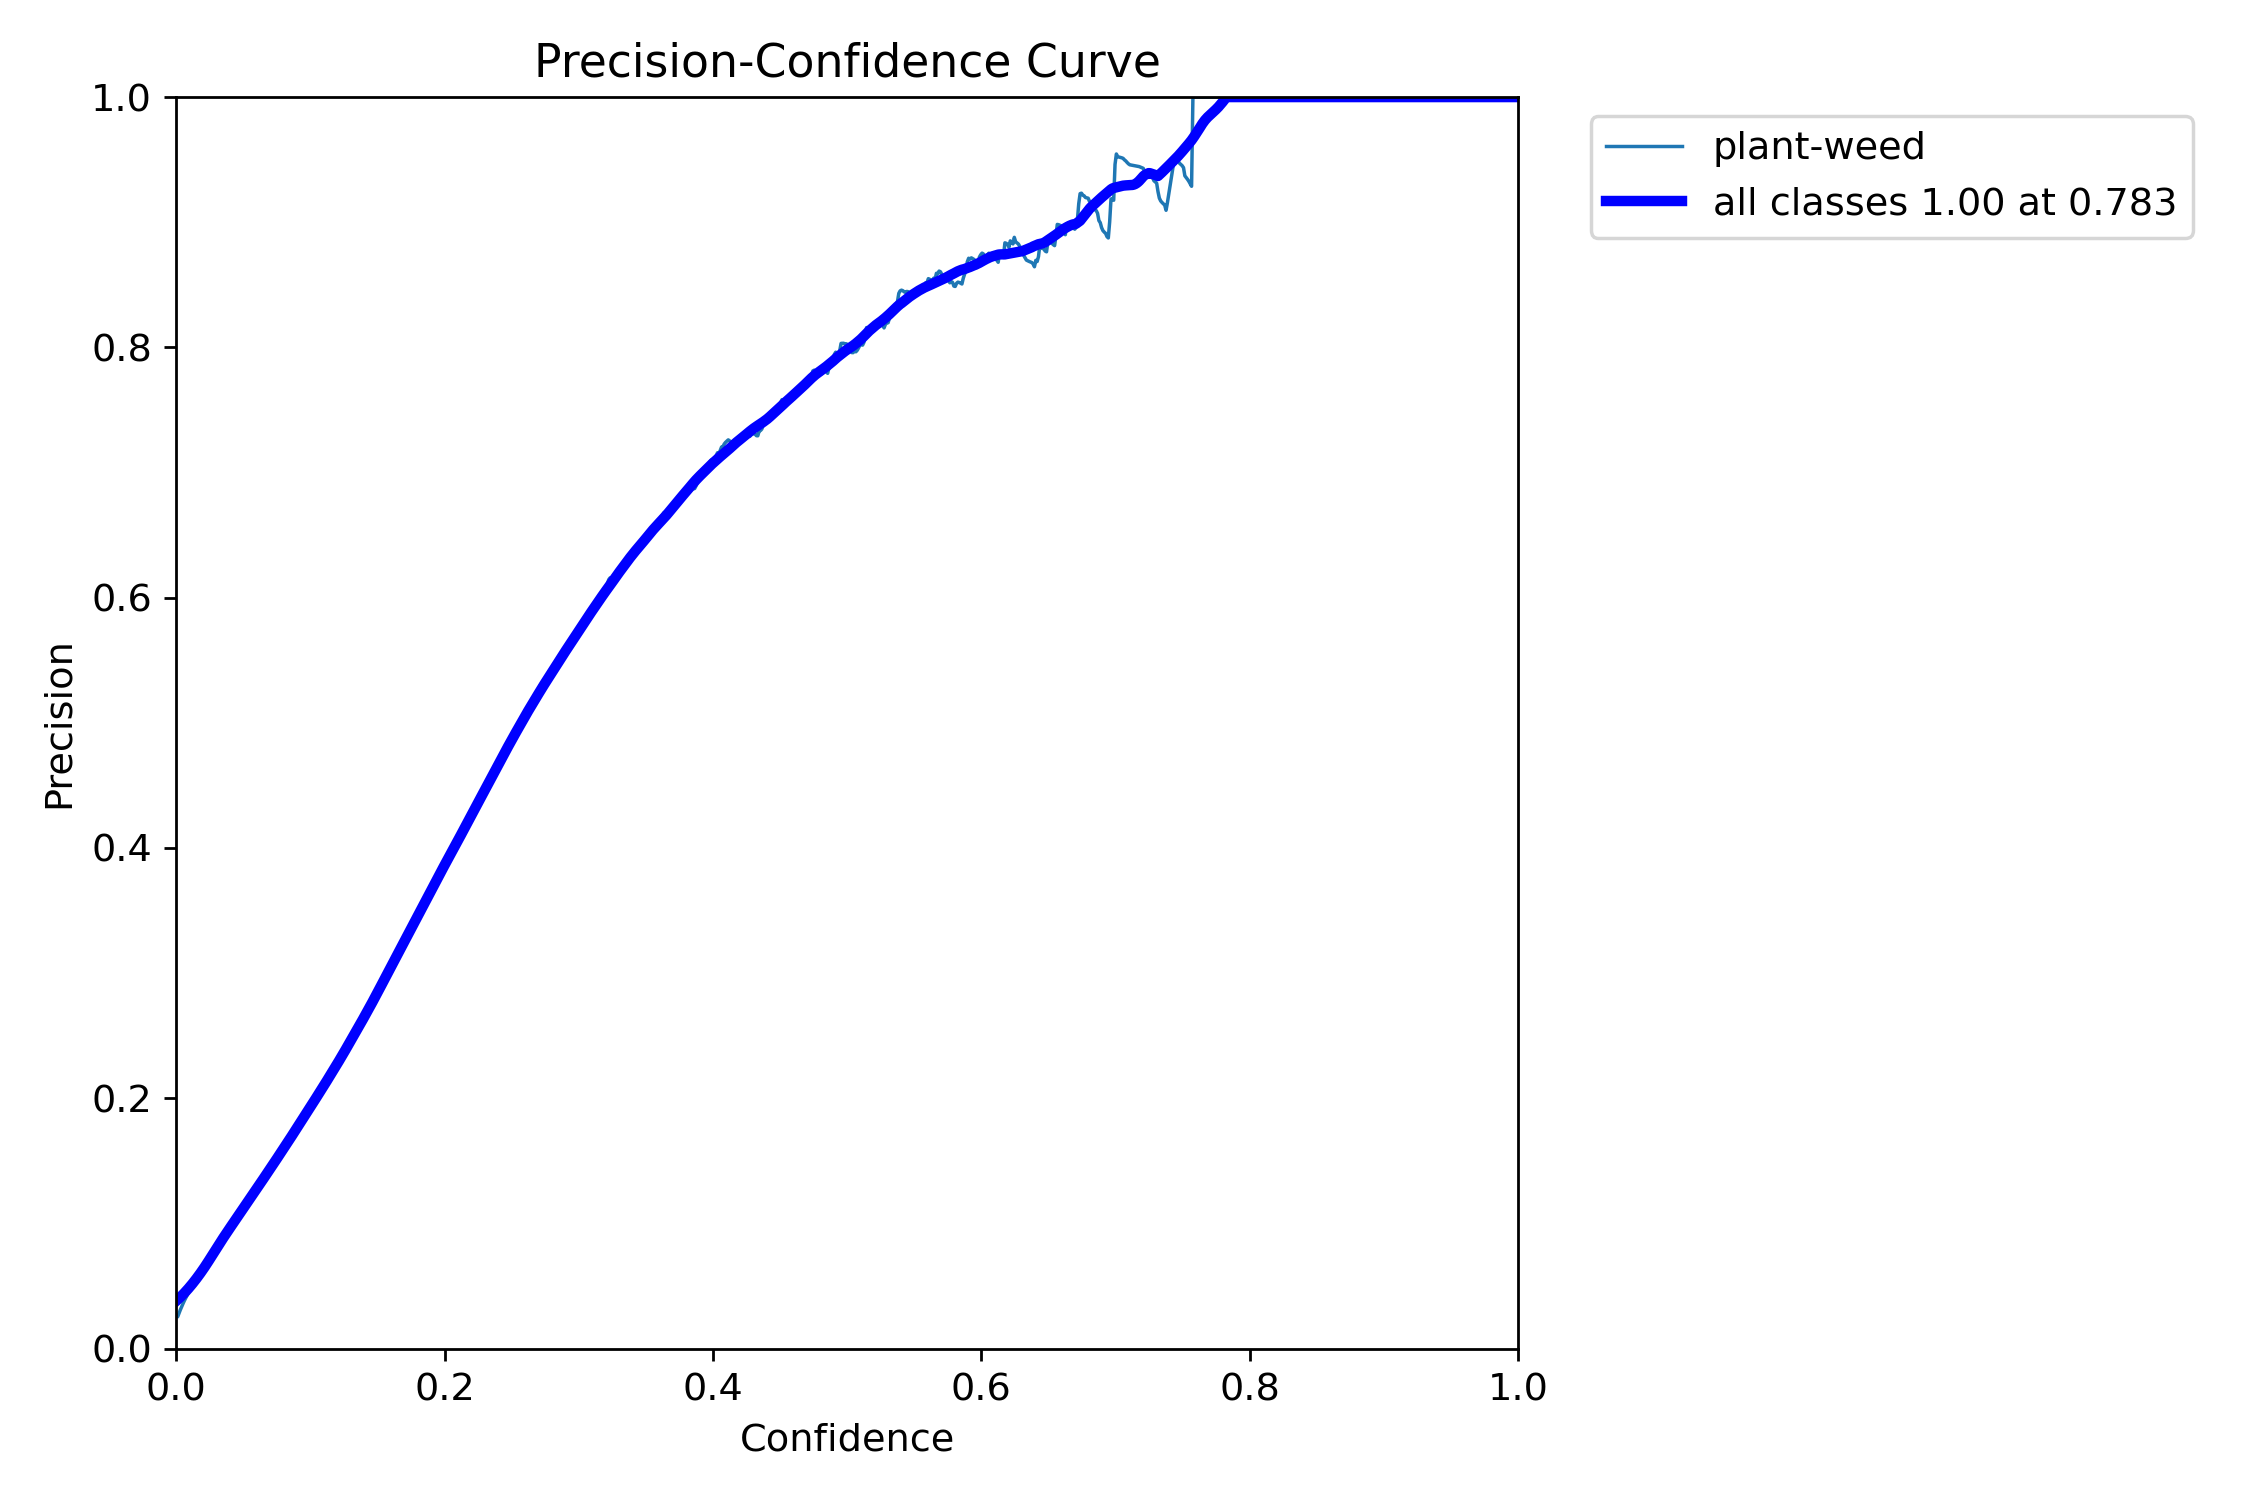

In [28]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

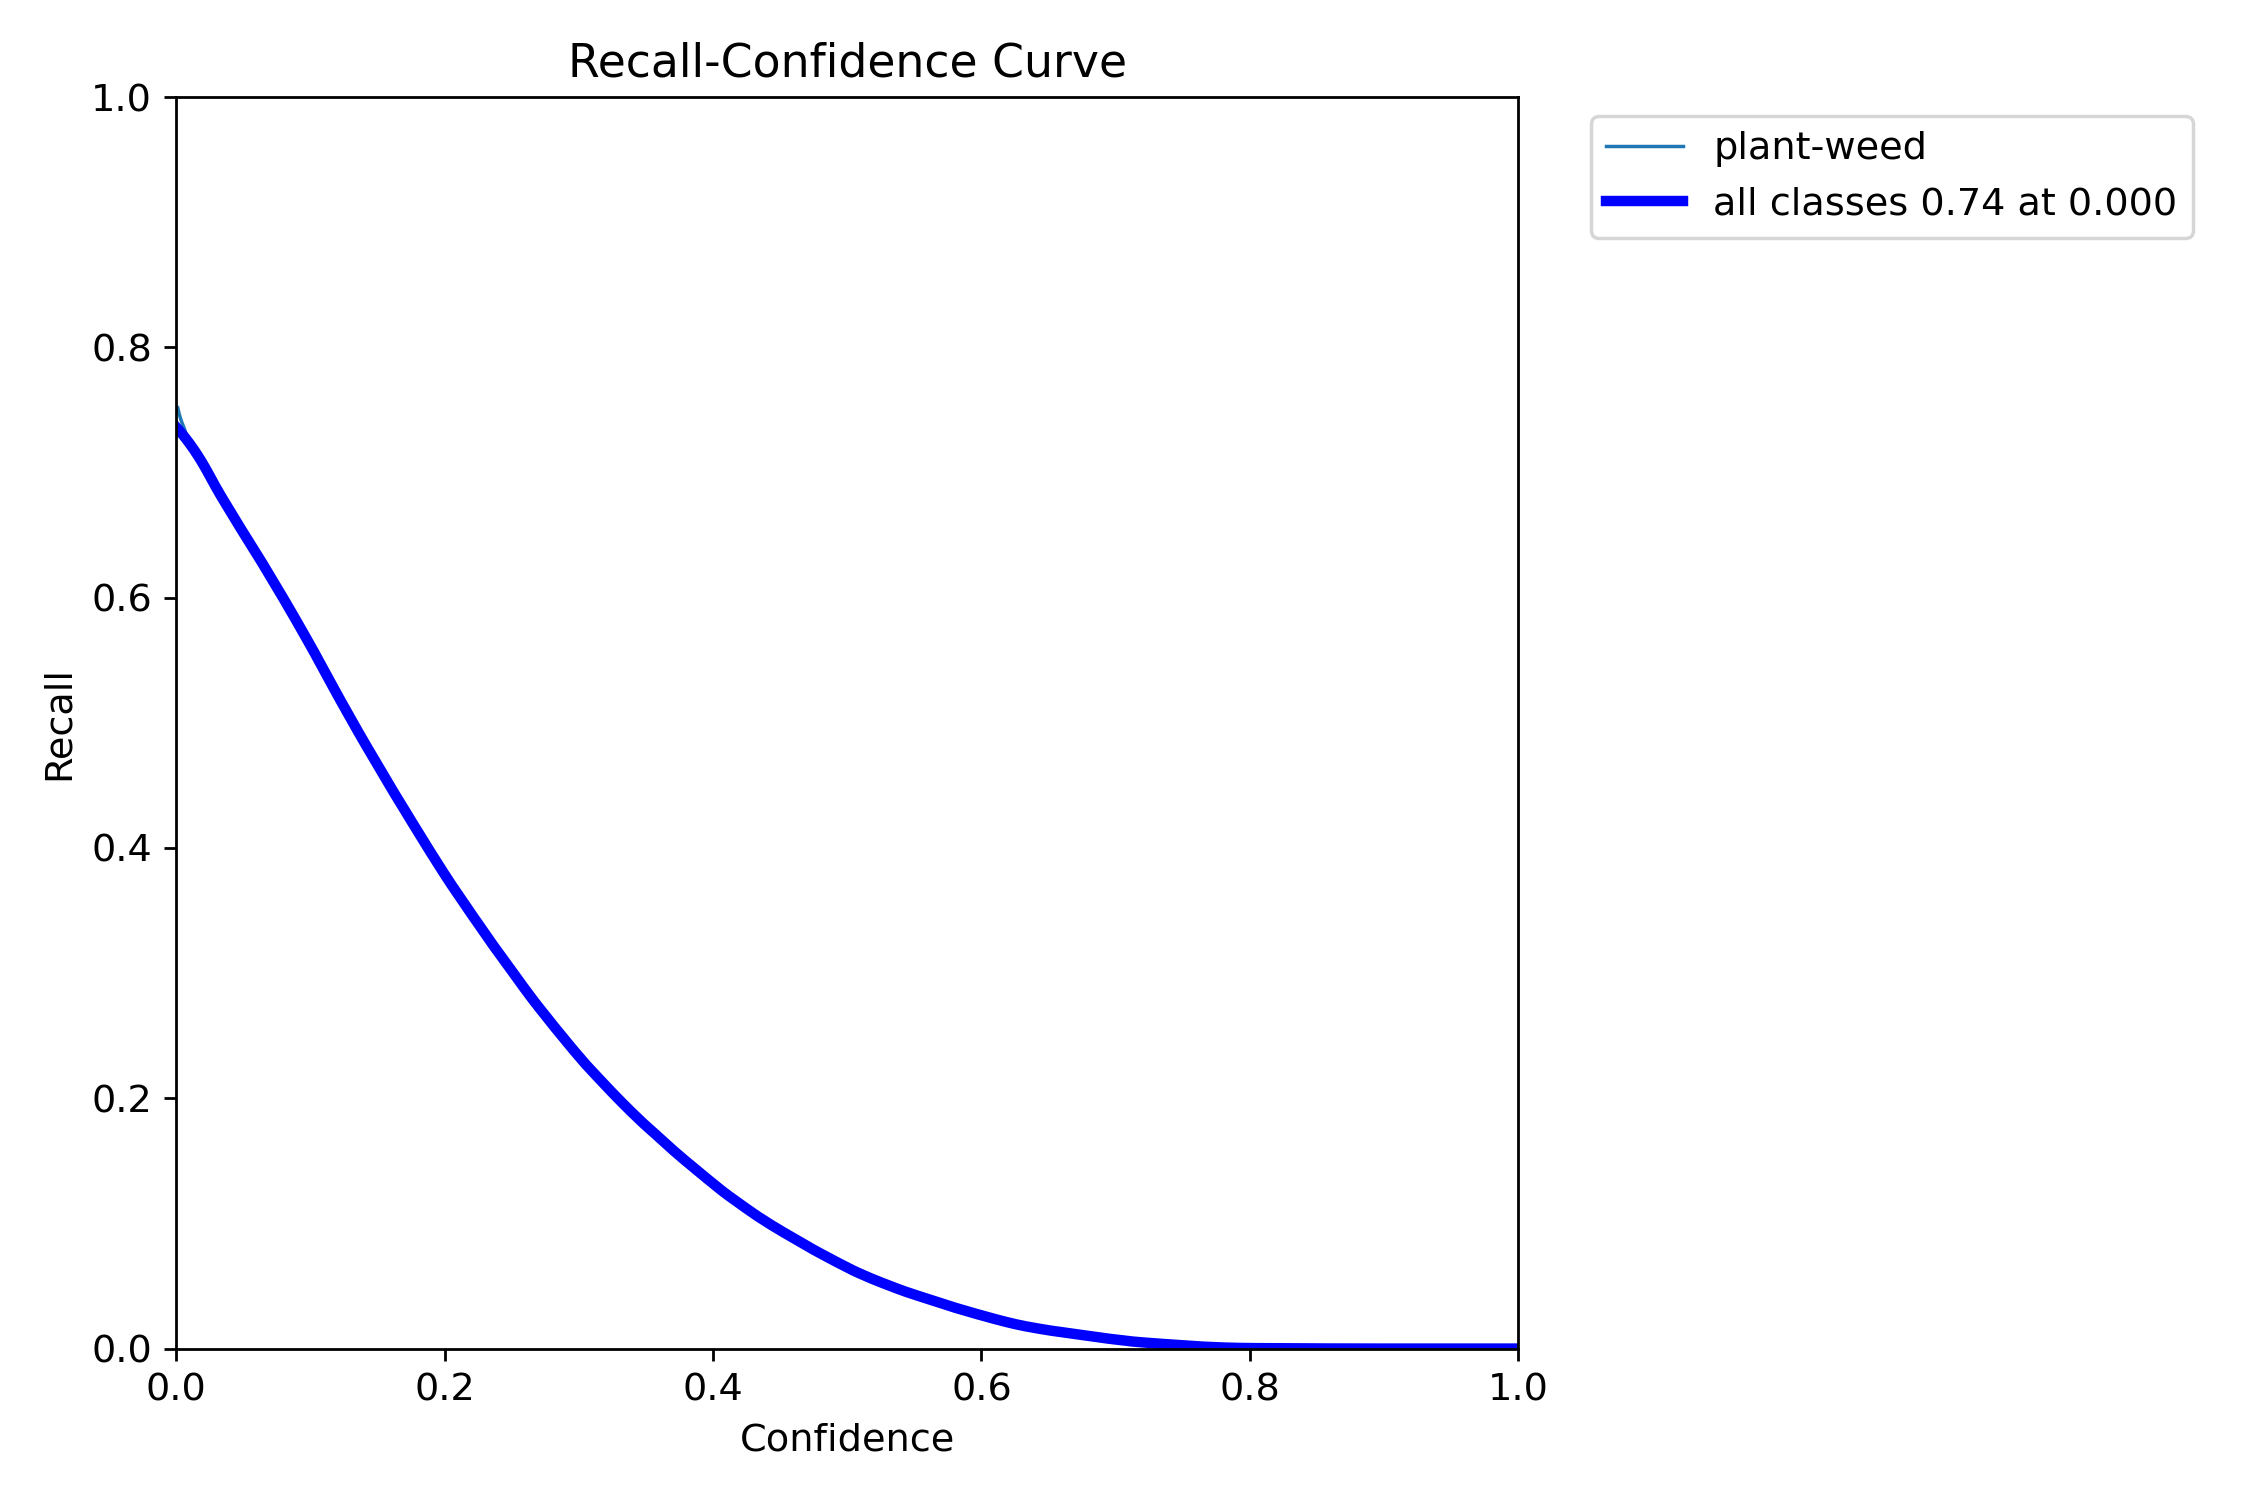

In [29]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

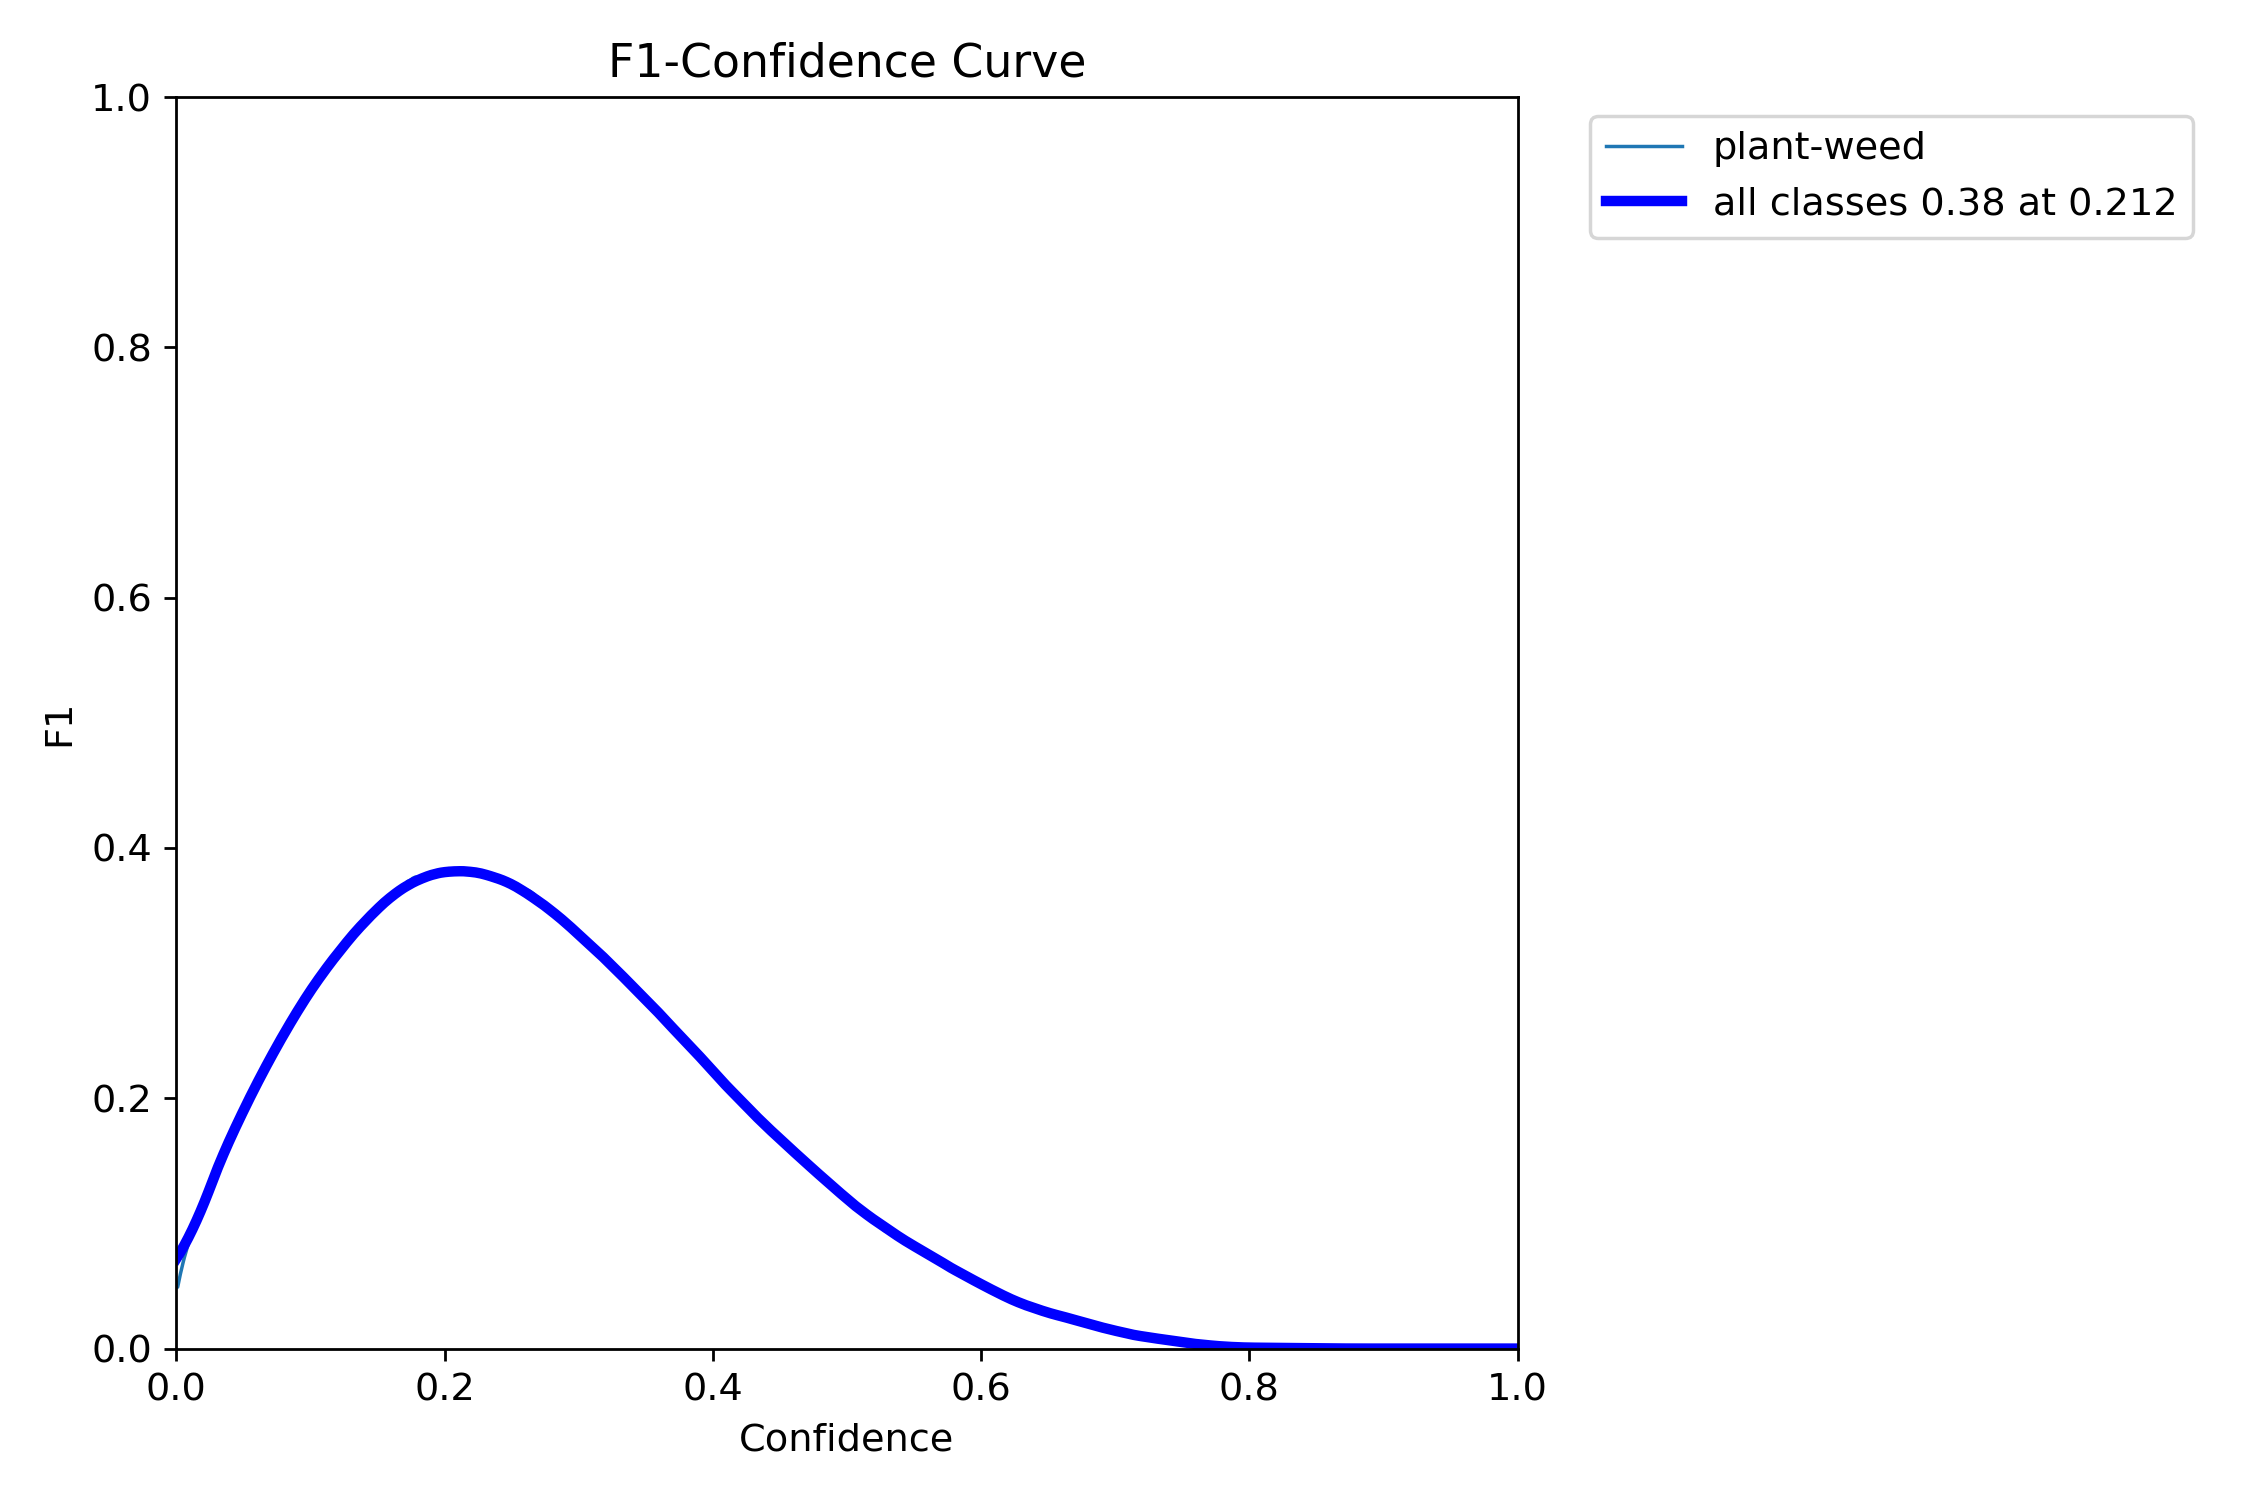

In [30]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

## Experiment 12 *(full dataset)*
### *3.5m + 5m | 60º | mid + large*

In [31]:
folder = "train3/"

In [32]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df3 = pd.read_csv(file_path)
df3.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,522.838,2.02406,1.41345,1.43655,0.44005,0.36096,0.33774,0.11548,2.36606,1.55087,1.68446,0.000119,0.000119,0.000119
96,97,528.228,2.00602,1.42564,1.45688,0.43632,0.35670,0.33716,0.11539,2.36941,1.55328,1.68784,0.000099,0.000099,0.000099
97,98,533.192,2.02051,1.41788,1.44644,0.43931,0.35597,0.33878,0.11649,2.37076,1.55378,1.68761,0.000079,0.000079,0.000079
98,99,537.681,2.01692,1.41147,1.44515,0.43848,0.35993,0.34460,0.11855,2.36425,1.54581,1.68235,0.000060,0.000060,0.000060
99,100,543.547,2.00334,1.42272,1.44821,0.43376,0.36301,0.34417,0.11852,2.36683,1.54569,1.68413,0.000040,0.000040,0.000040


In [33]:
last_row = df3.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 9.059 min


### Graphs

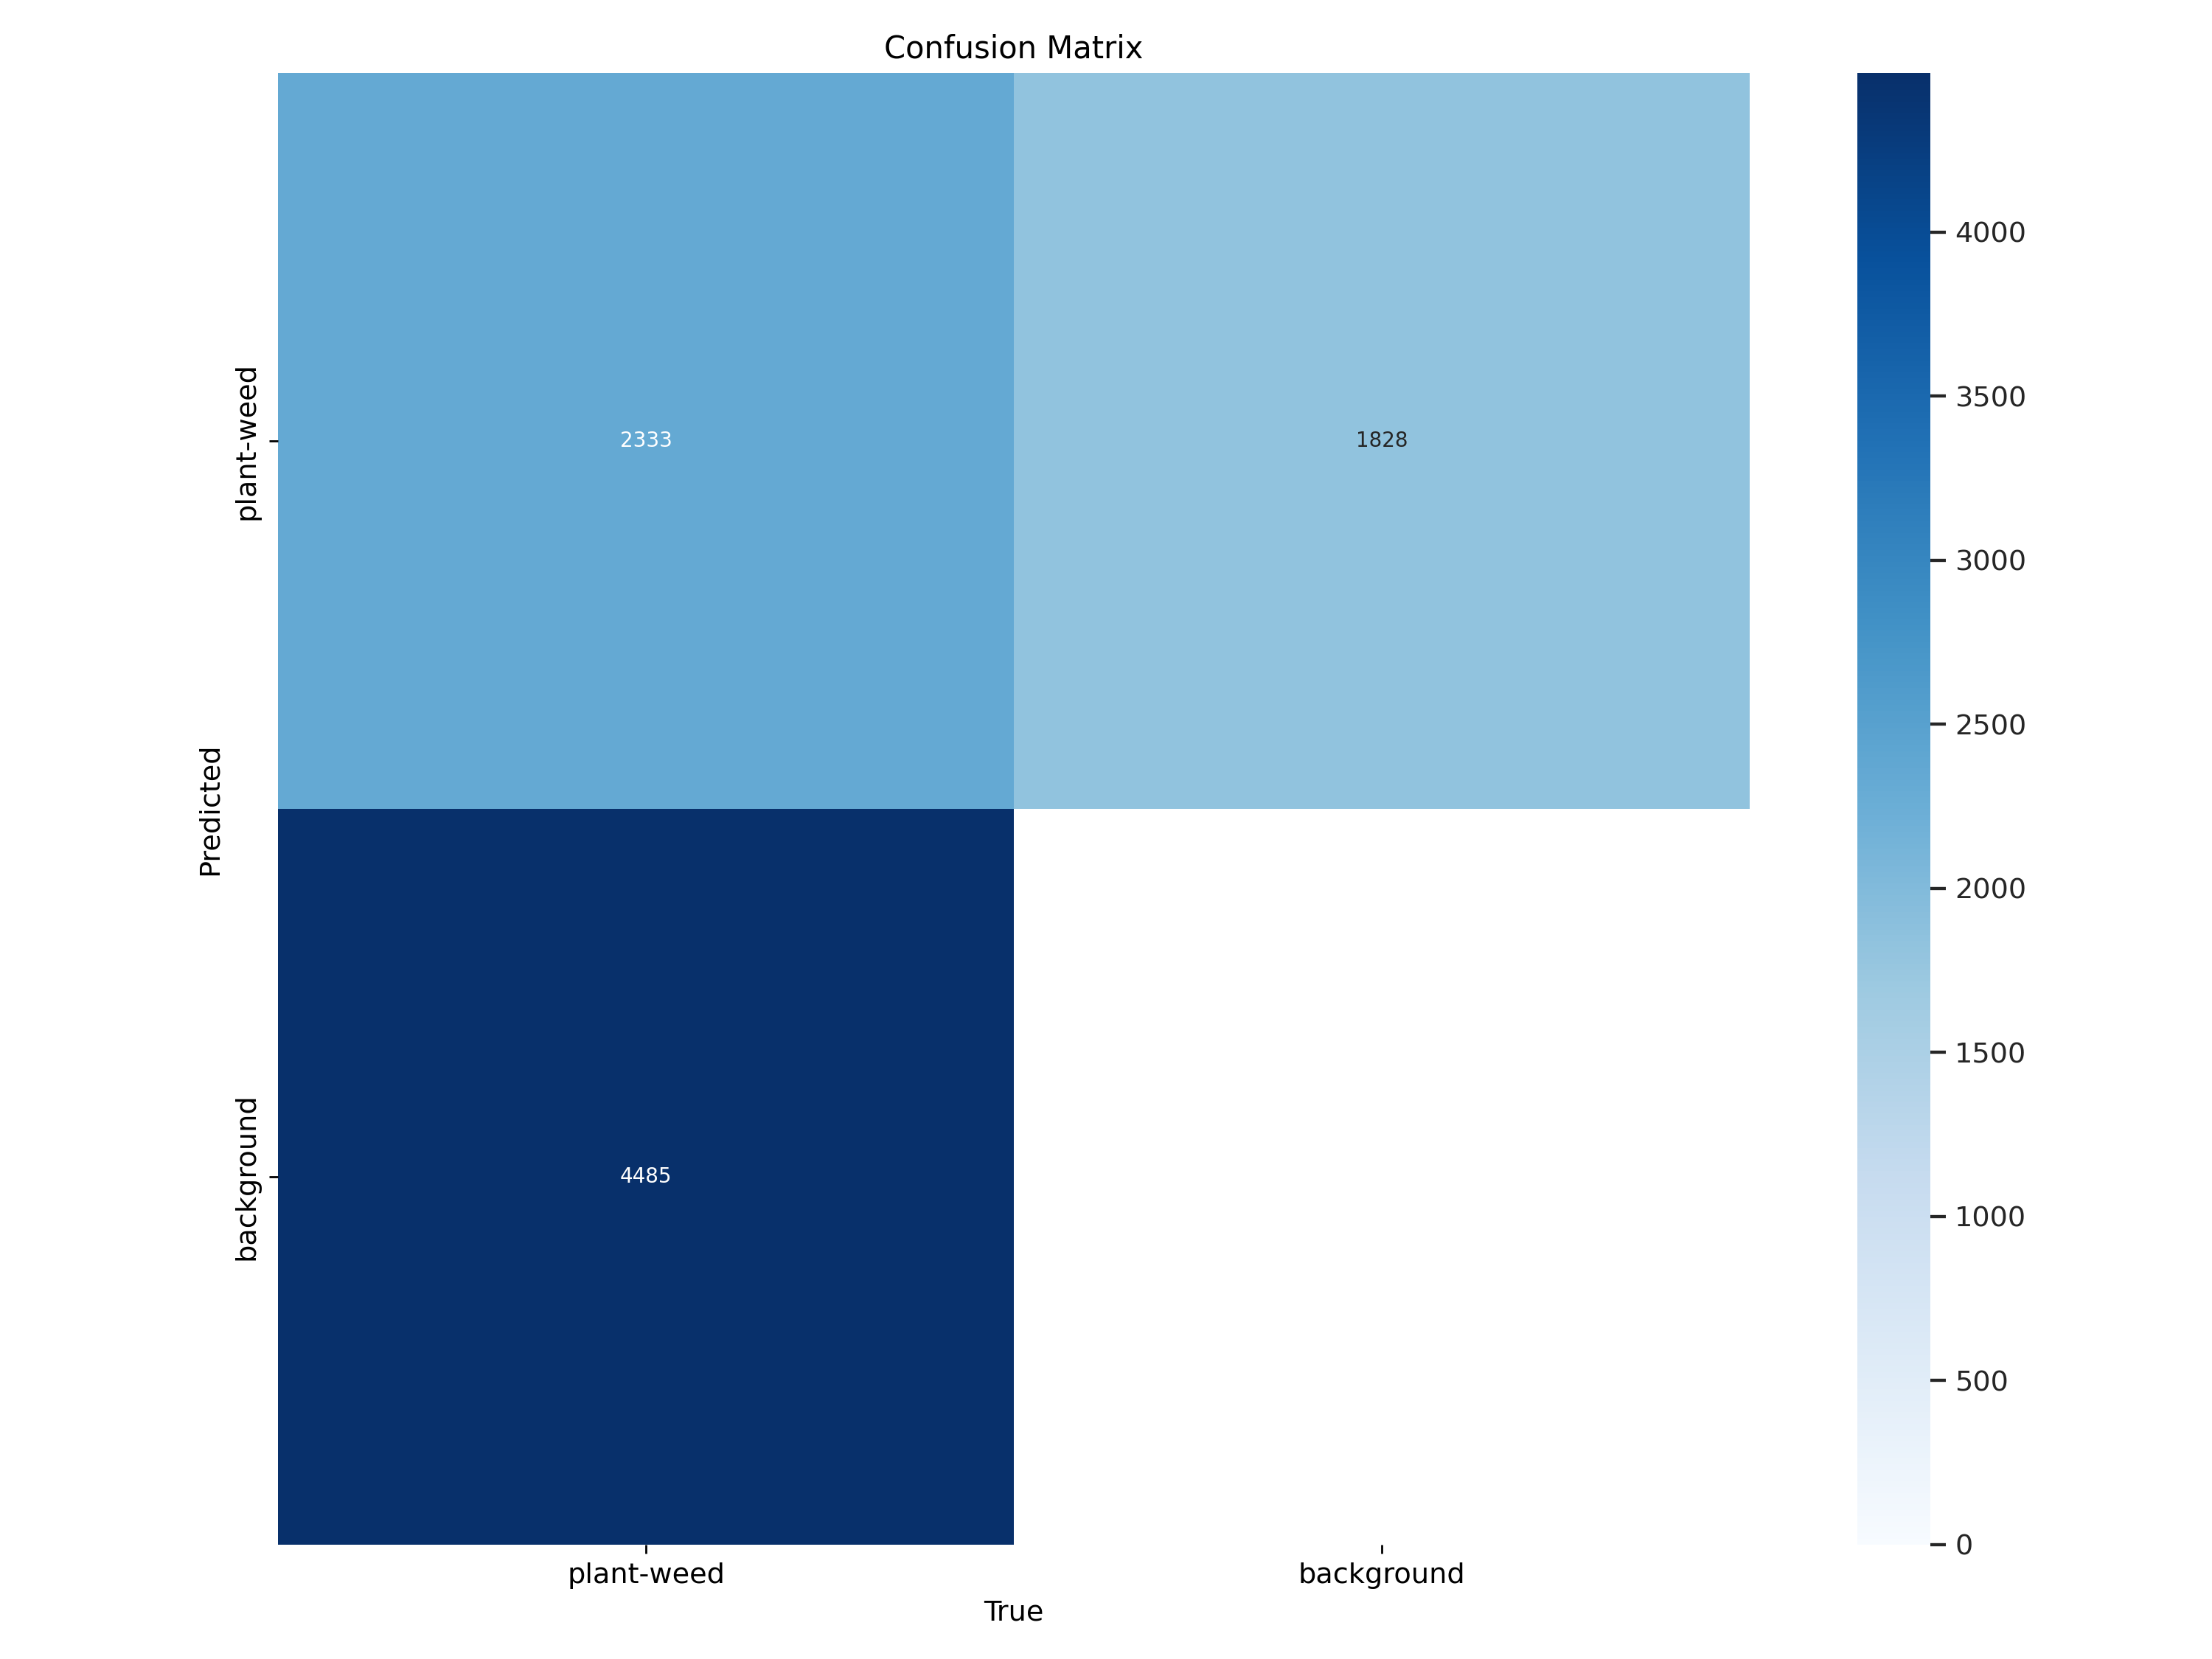

In [34]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

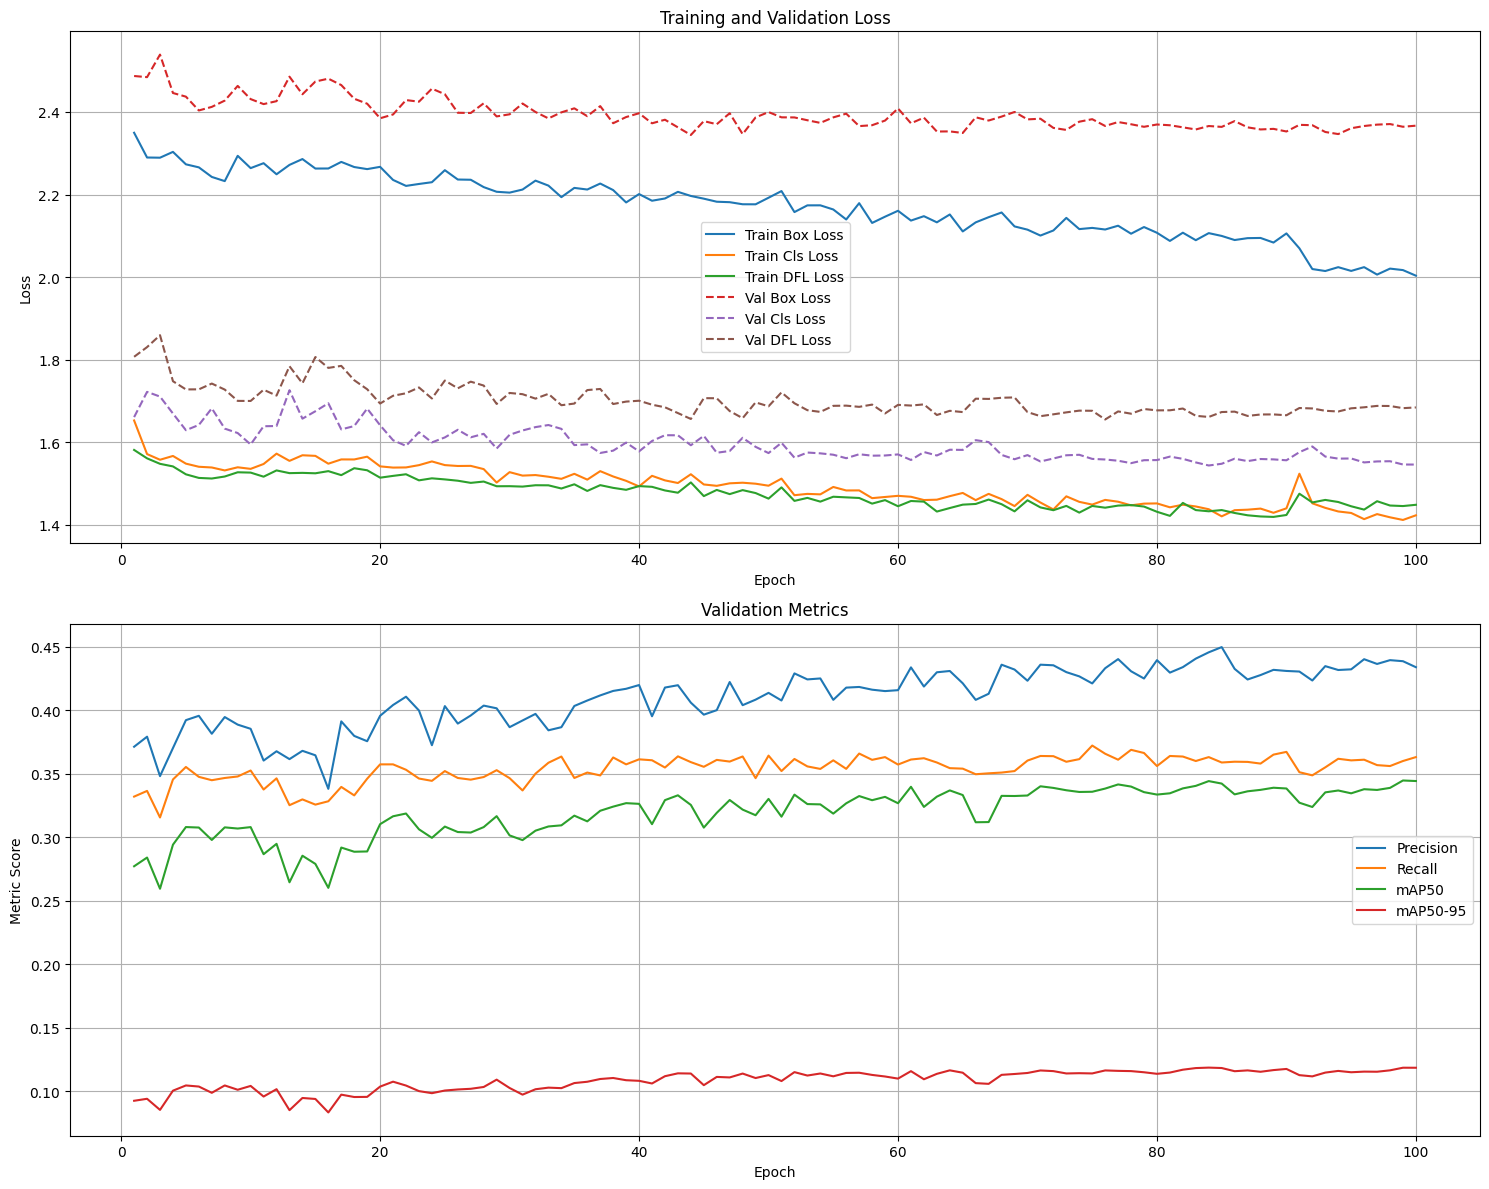

In [35]:
graph_training_metrics(df3, graph="full")

In [36]:
graph_LrLoss_3D(df3)

Validation set


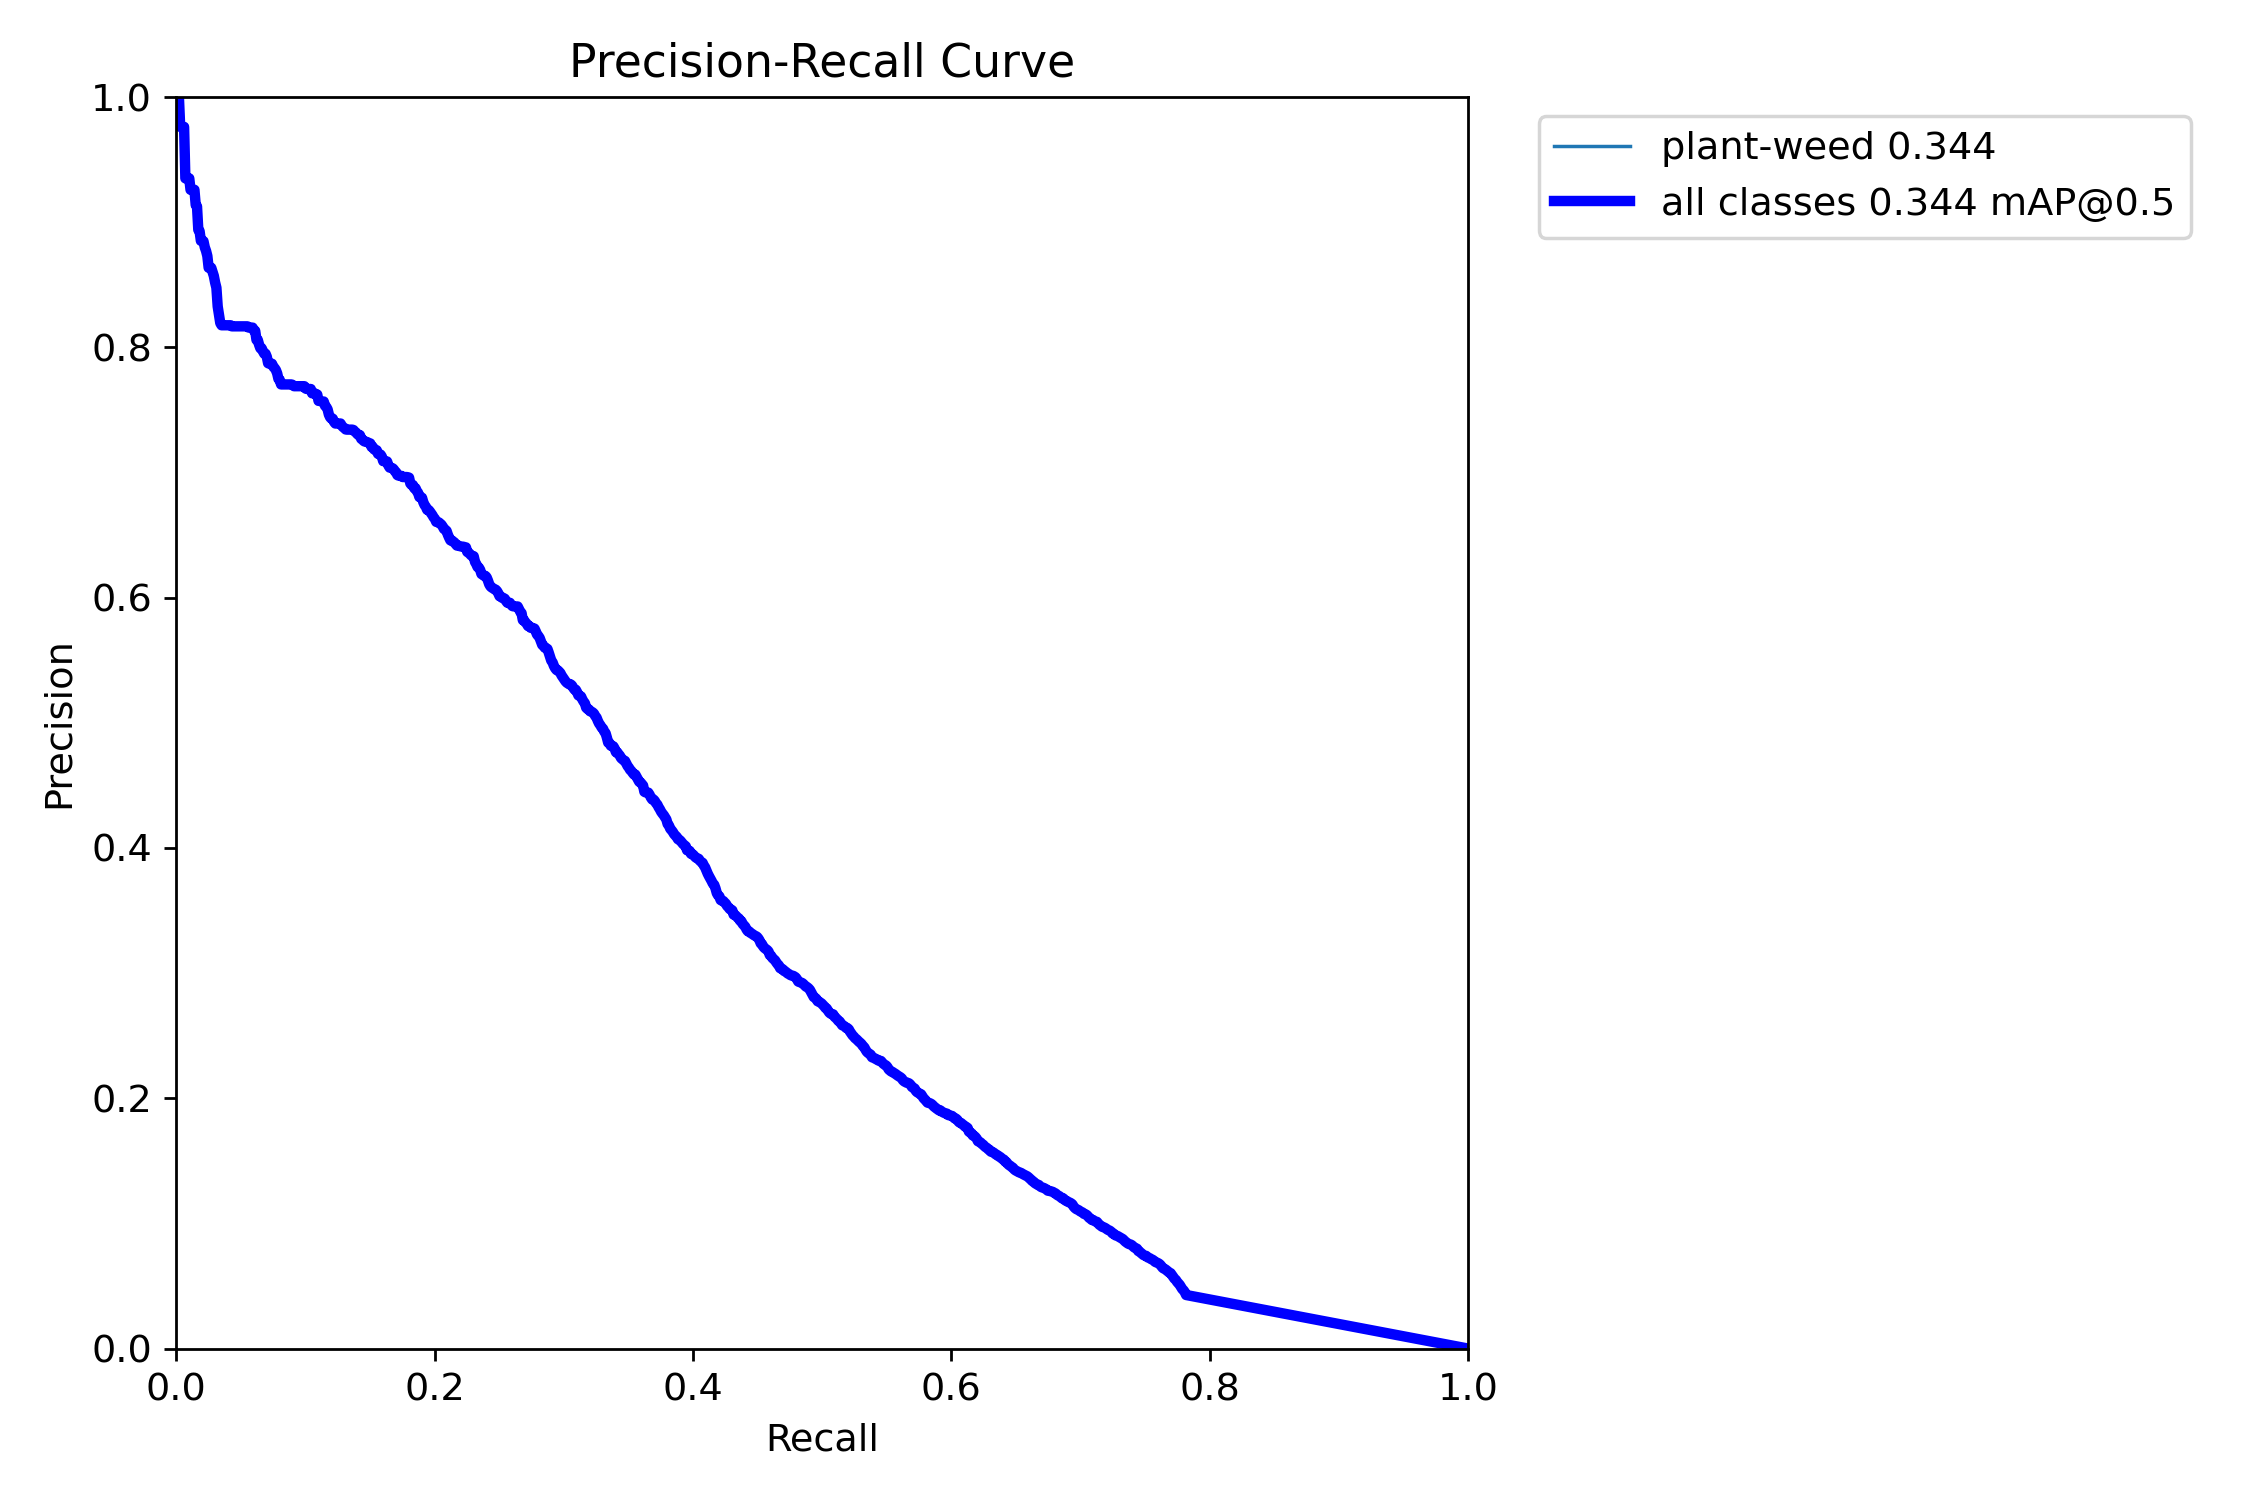

In [37]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

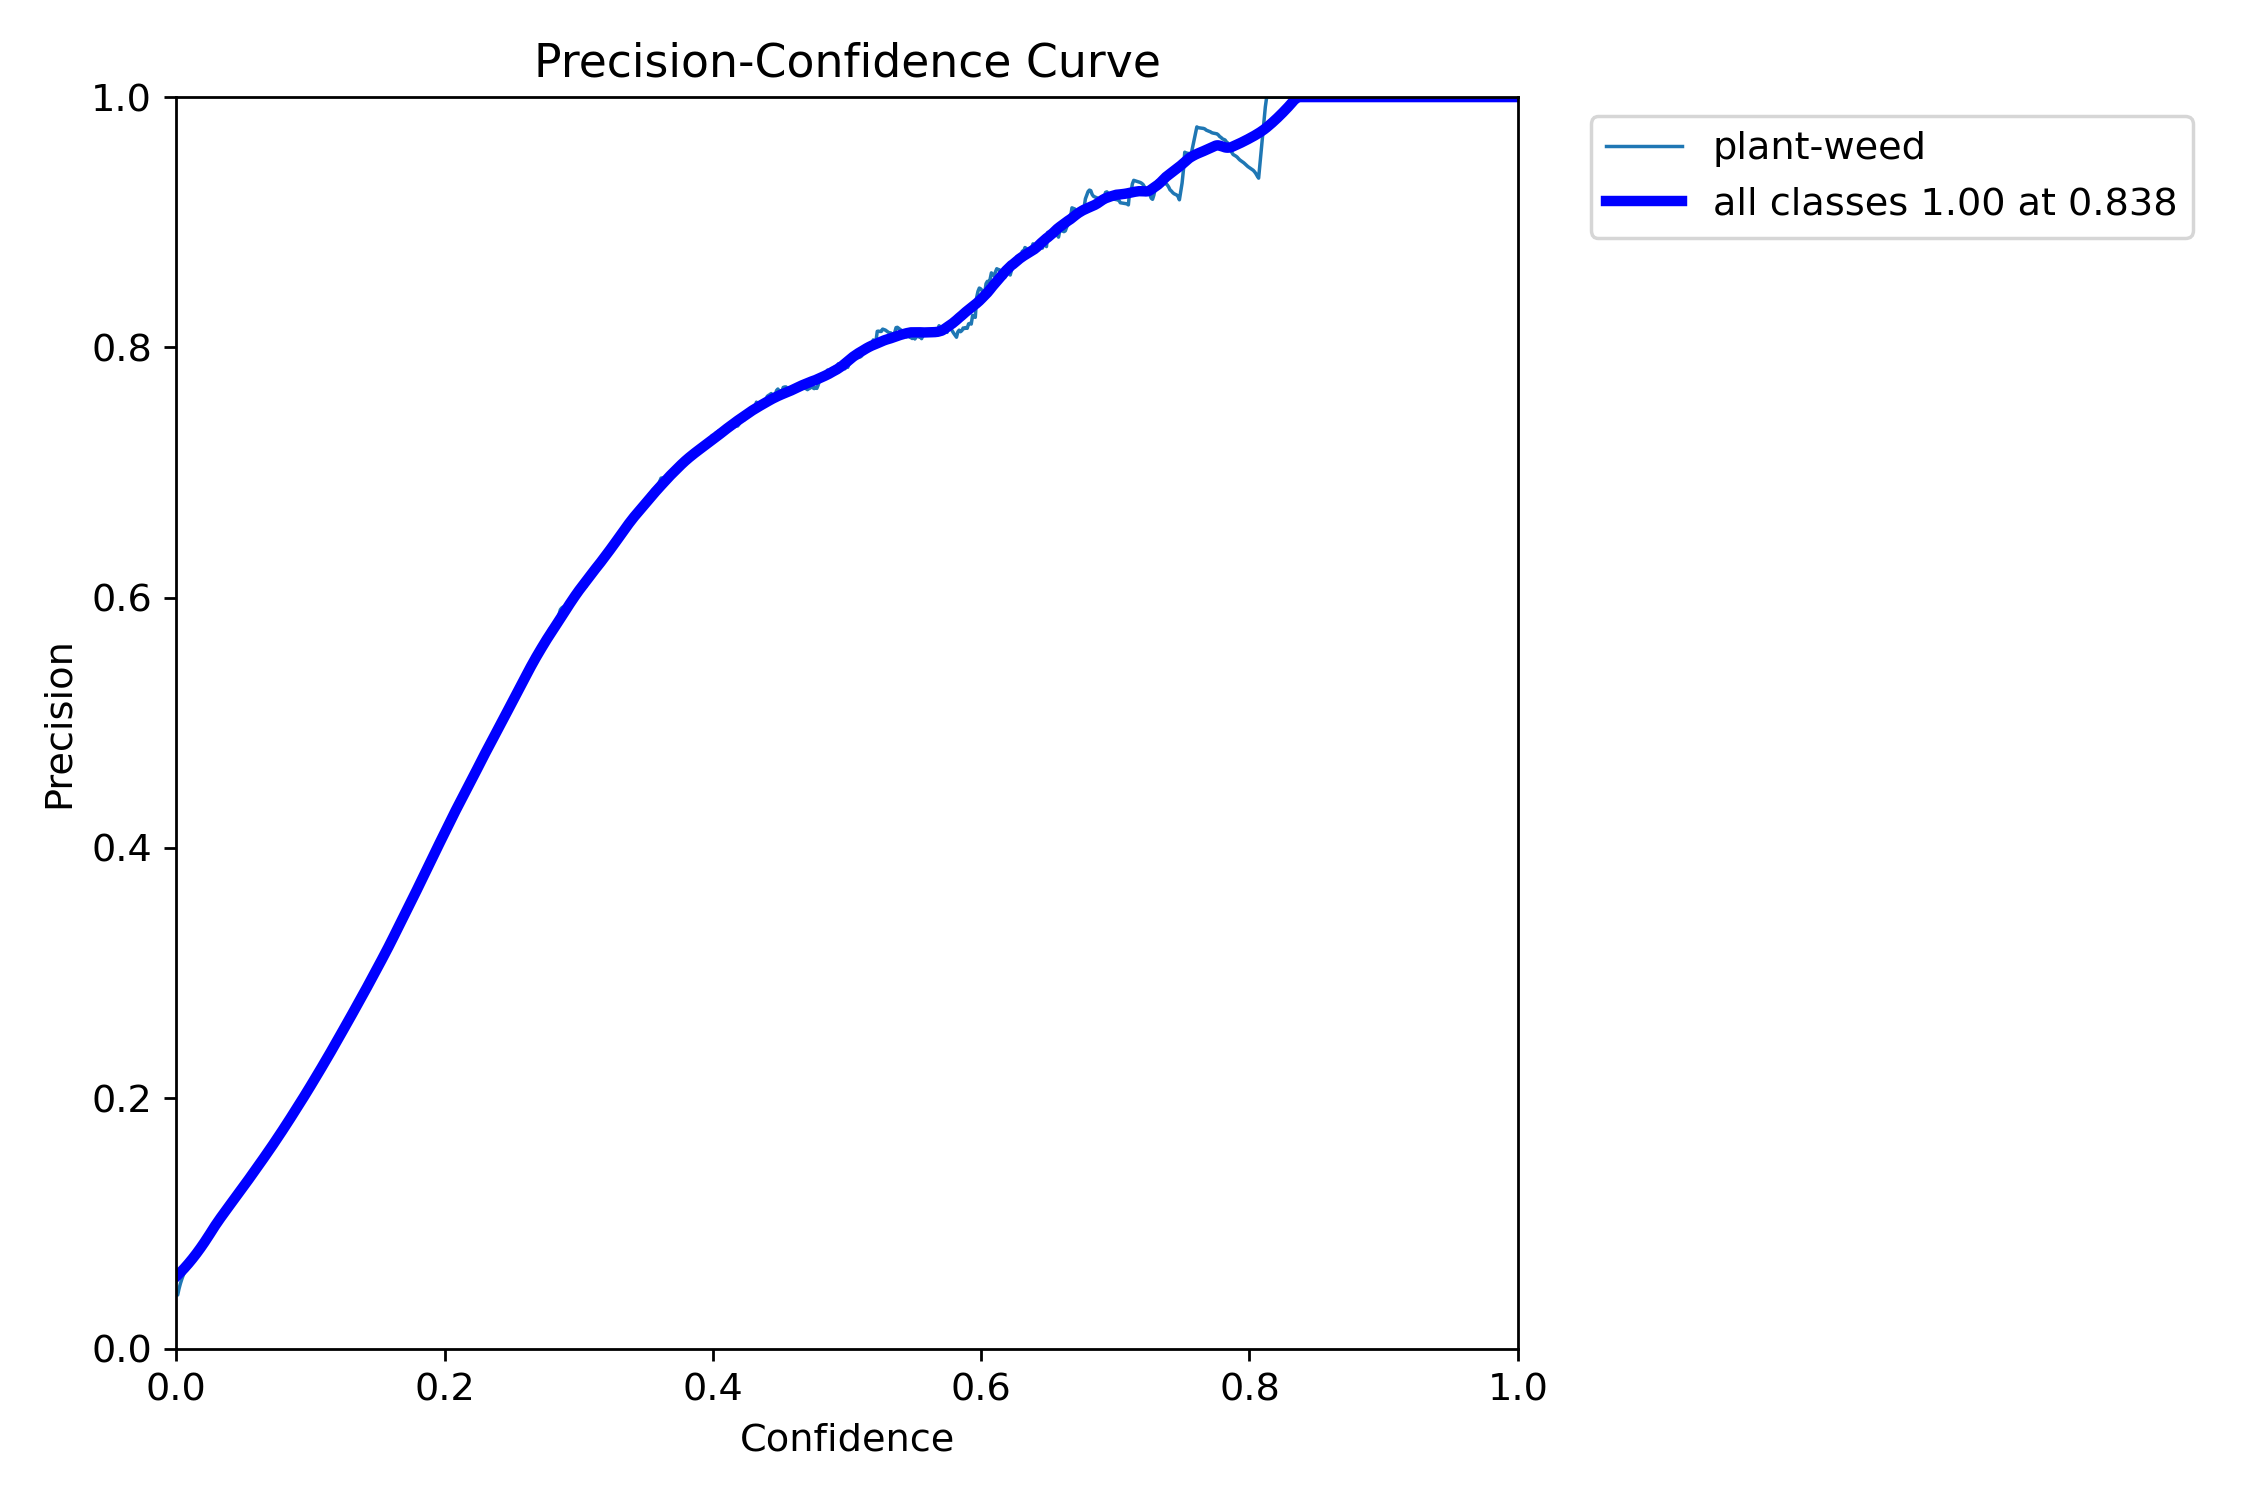

In [38]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

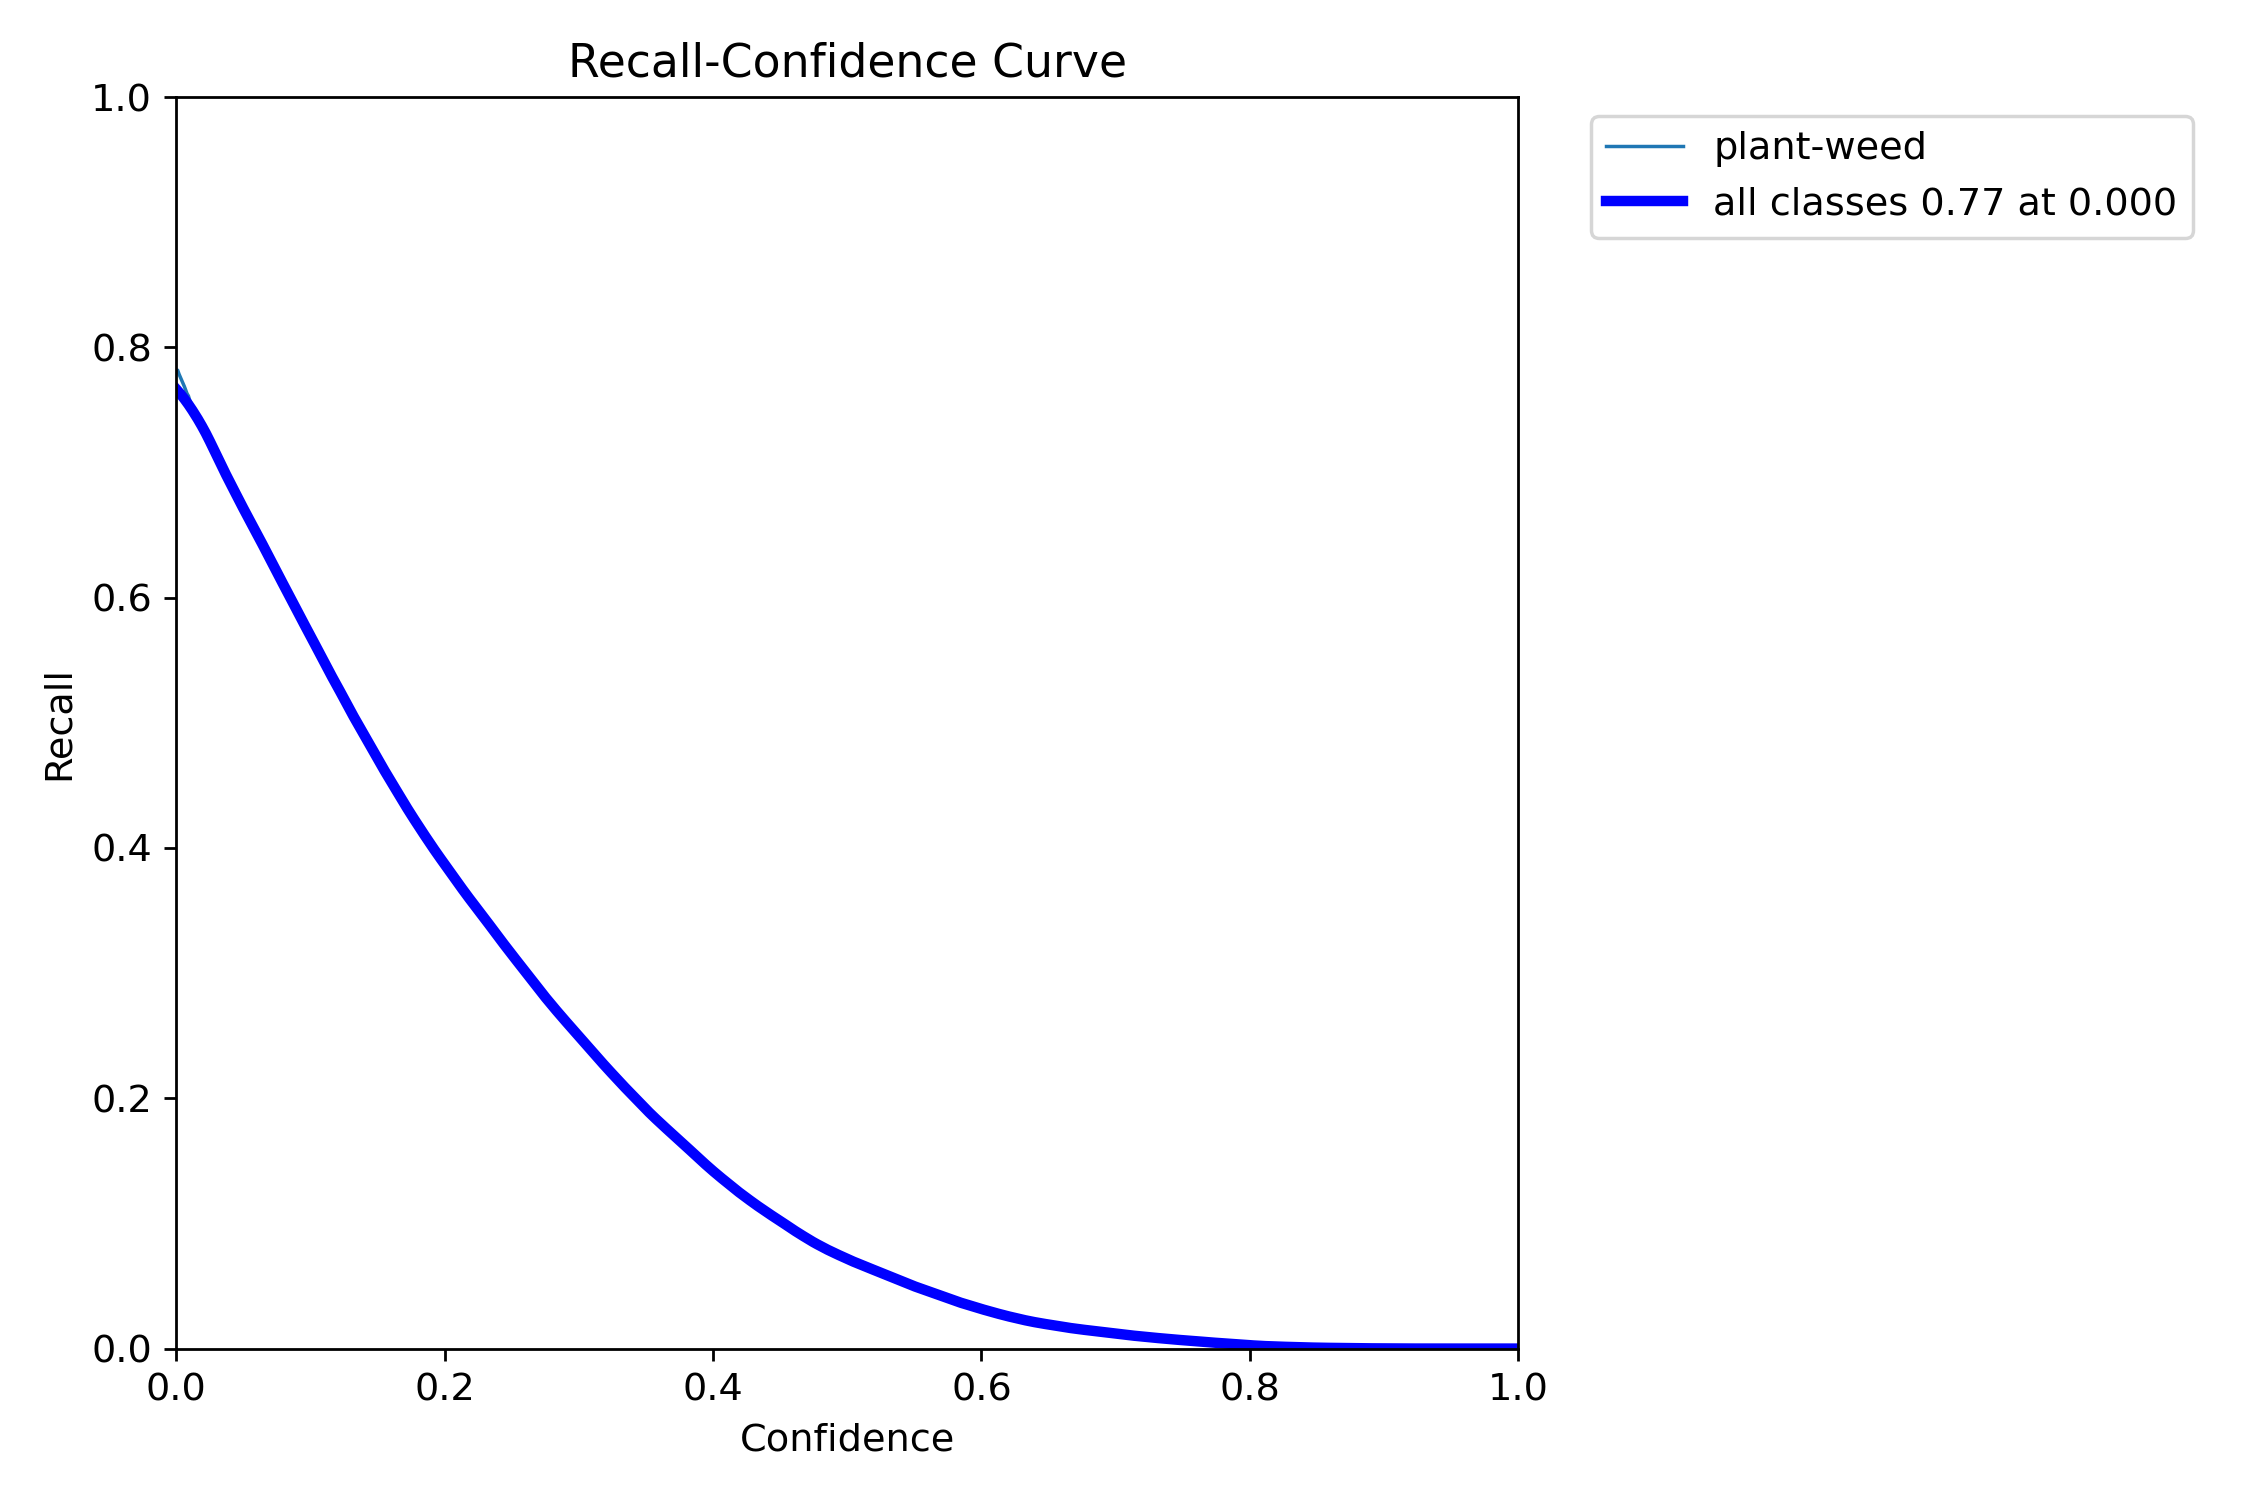

In [39]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

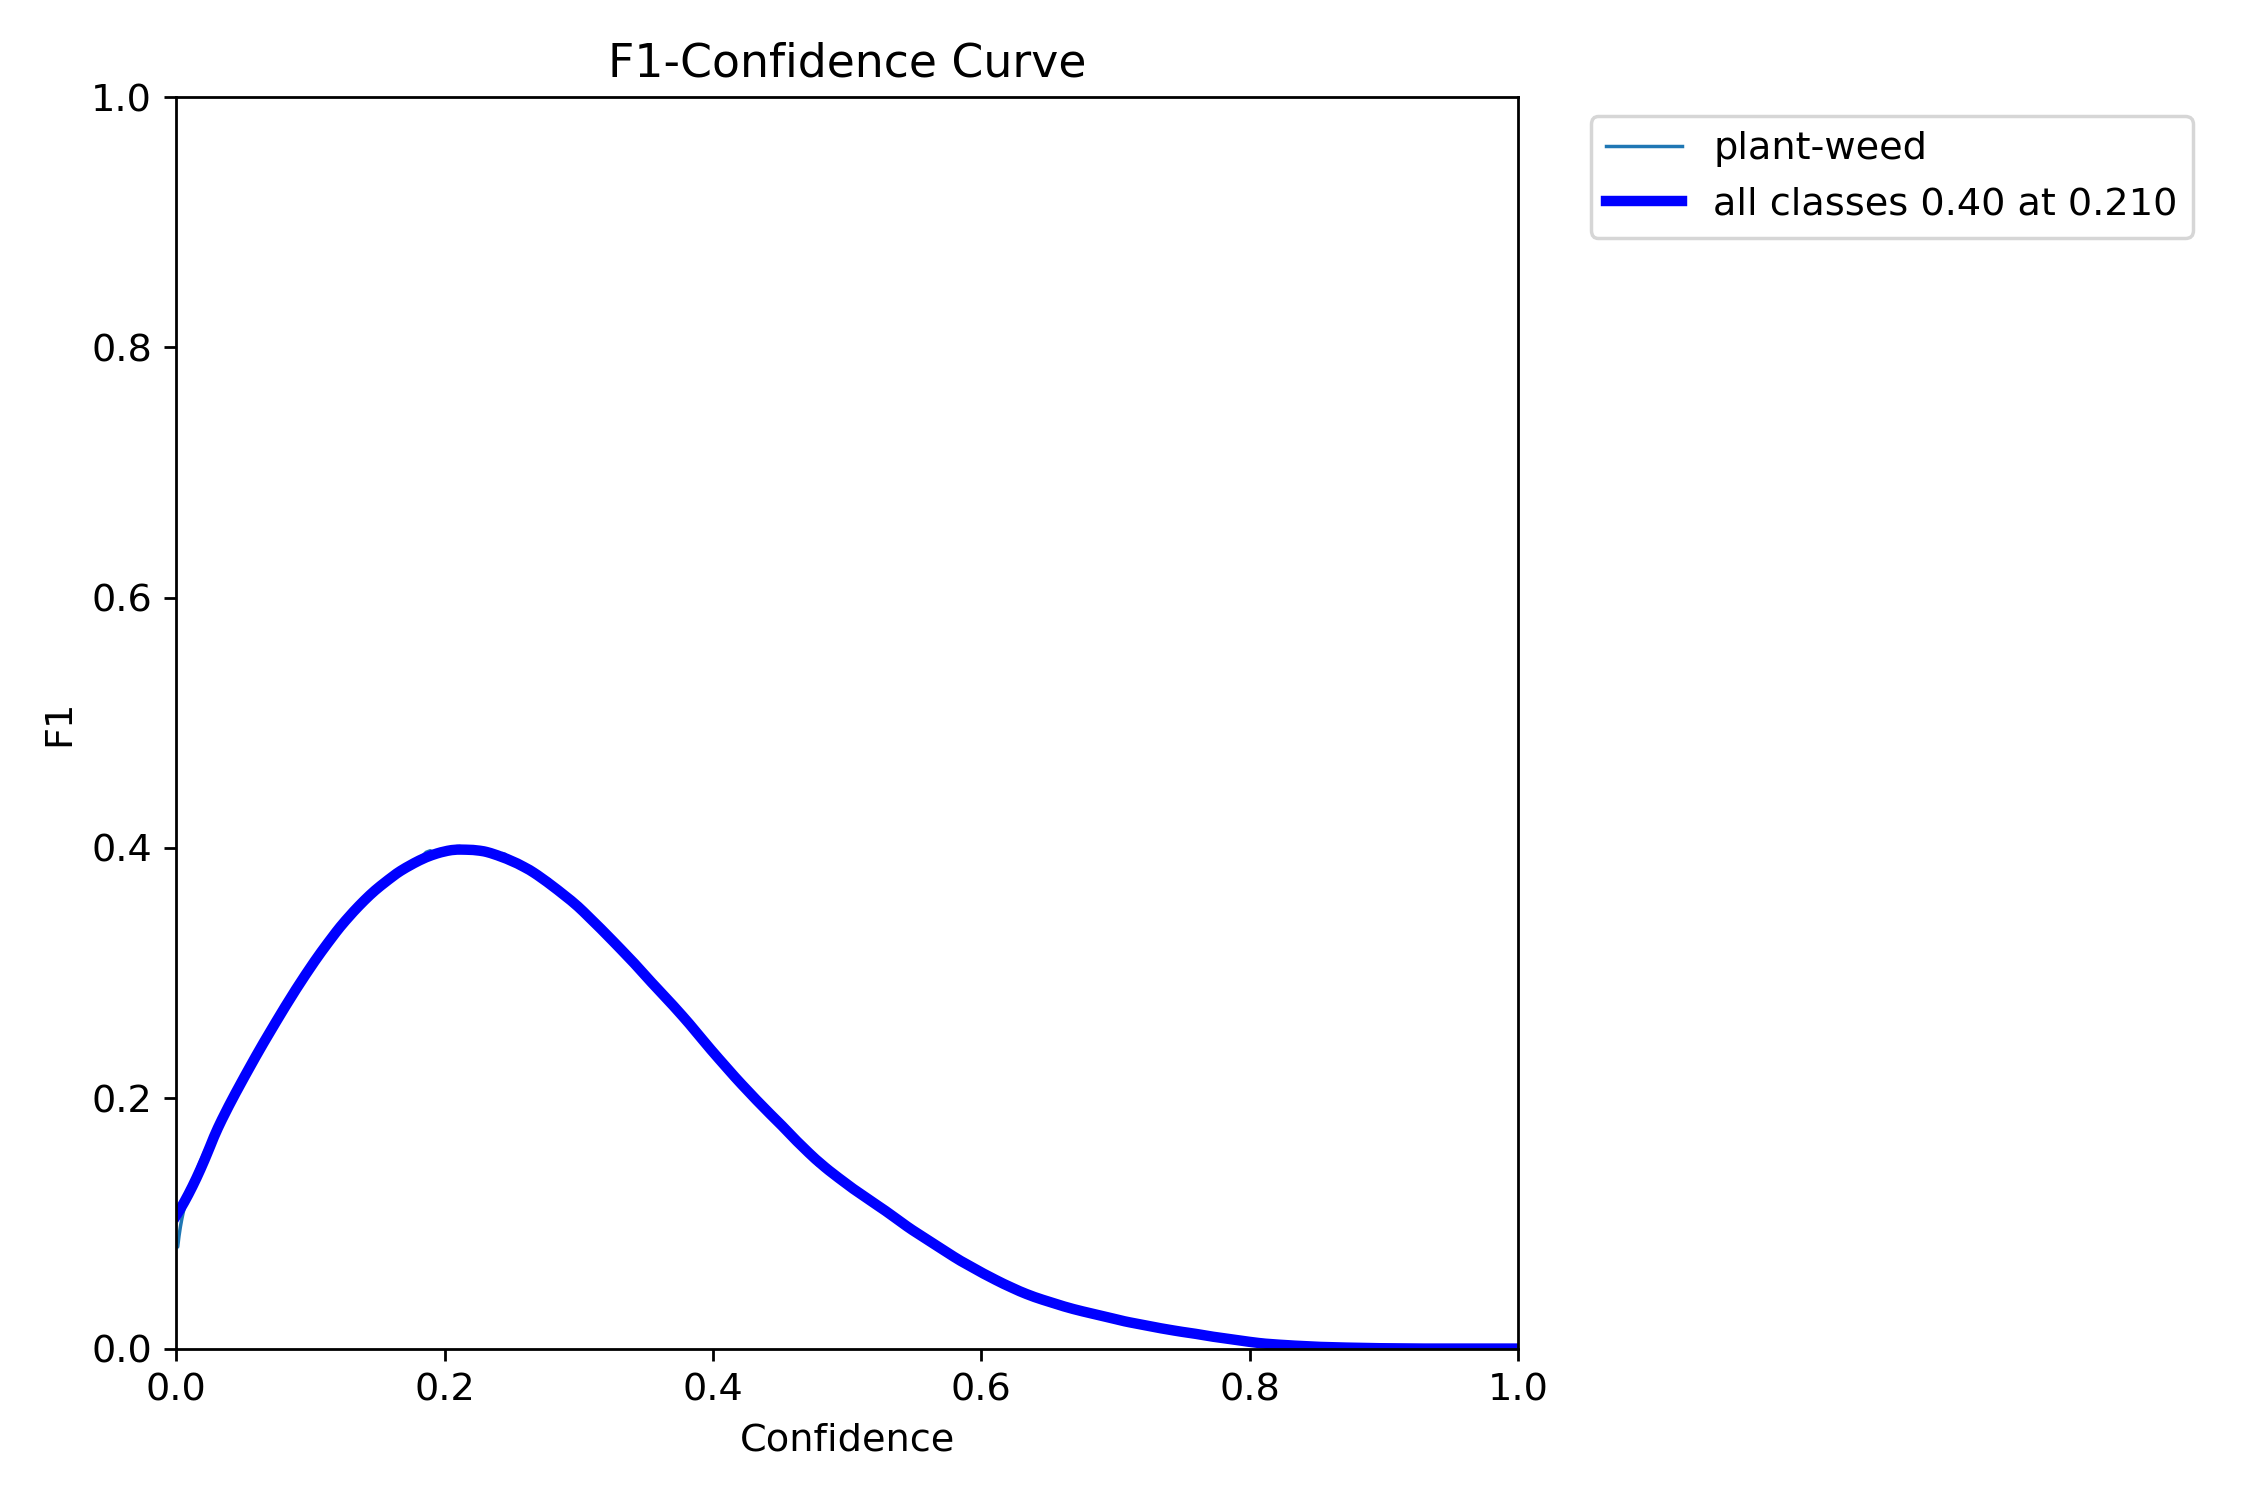

In [40]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

From the F1 curve, the confidence value that optimizes precision and recall is 0.231. In many cases a higher confidence value is desirable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

# Métricas generales

## Graphs

In [41]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Training and Validation Losses

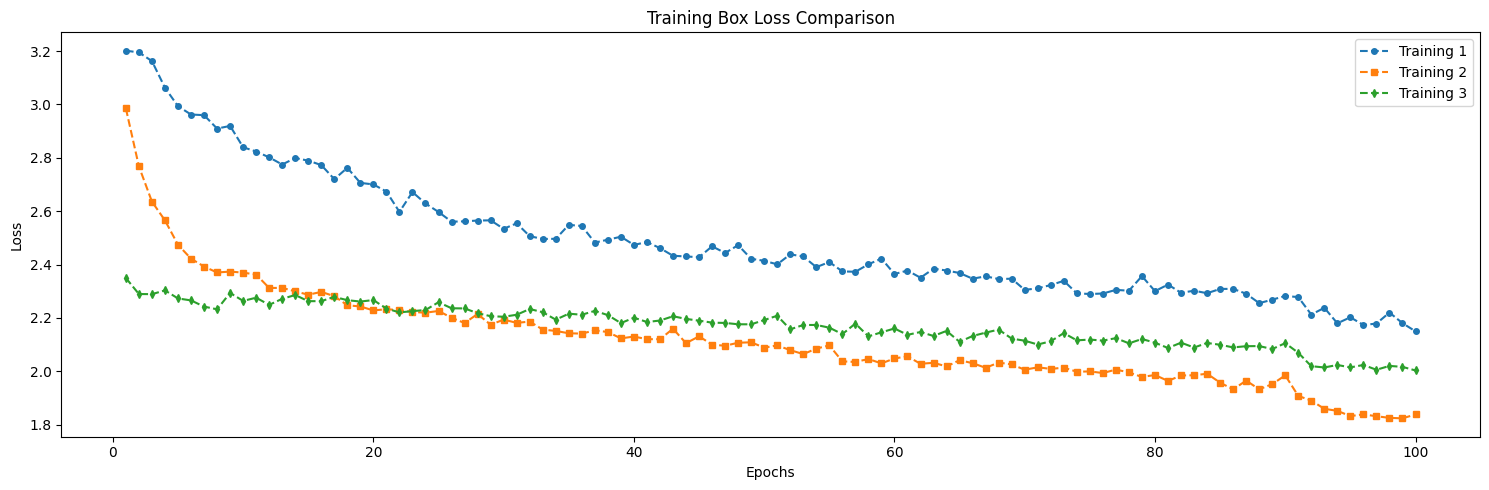

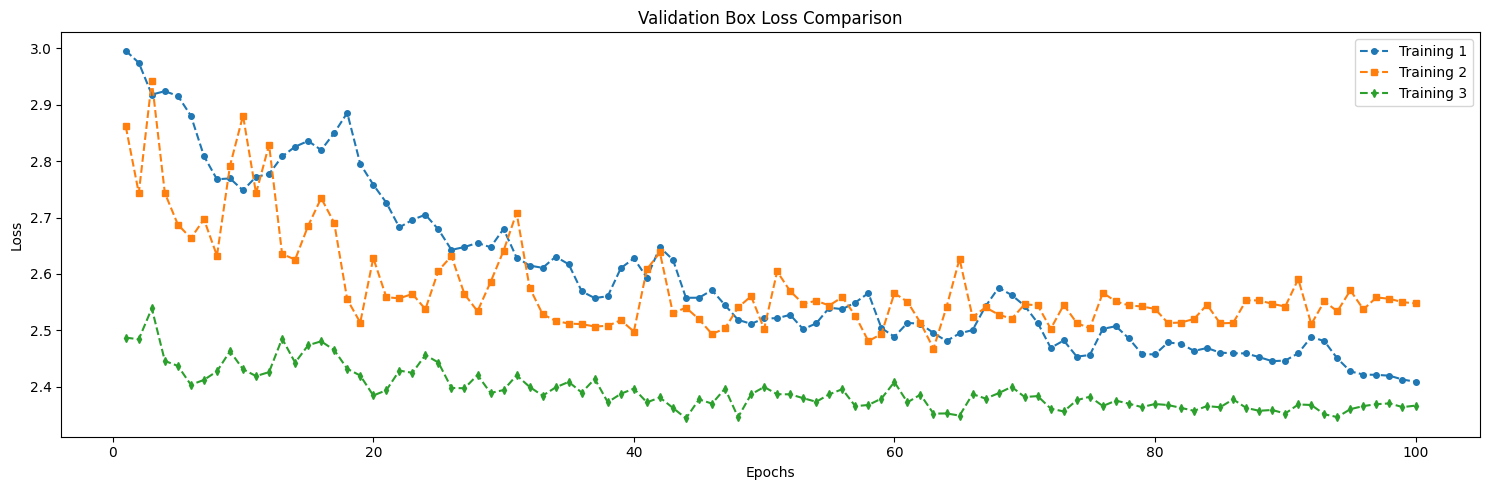

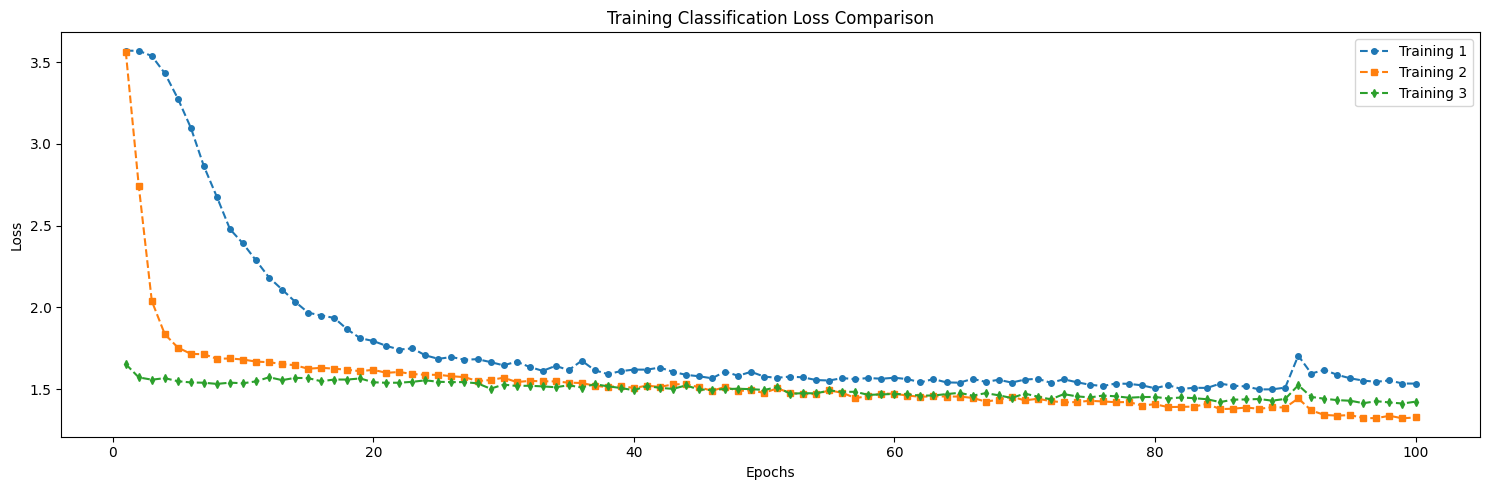

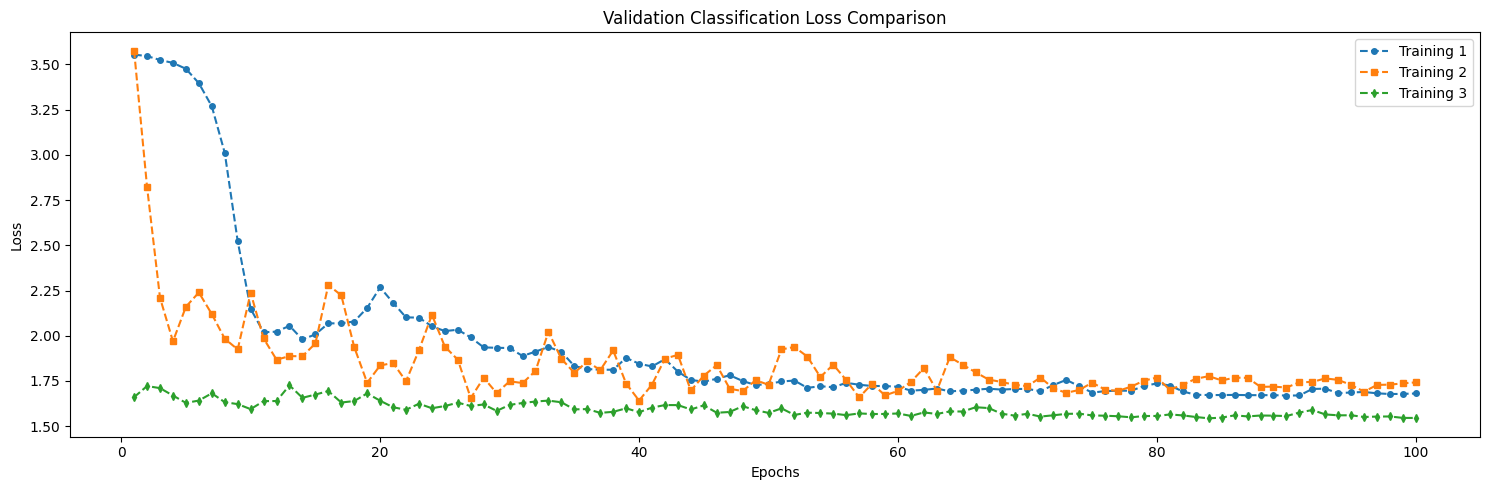

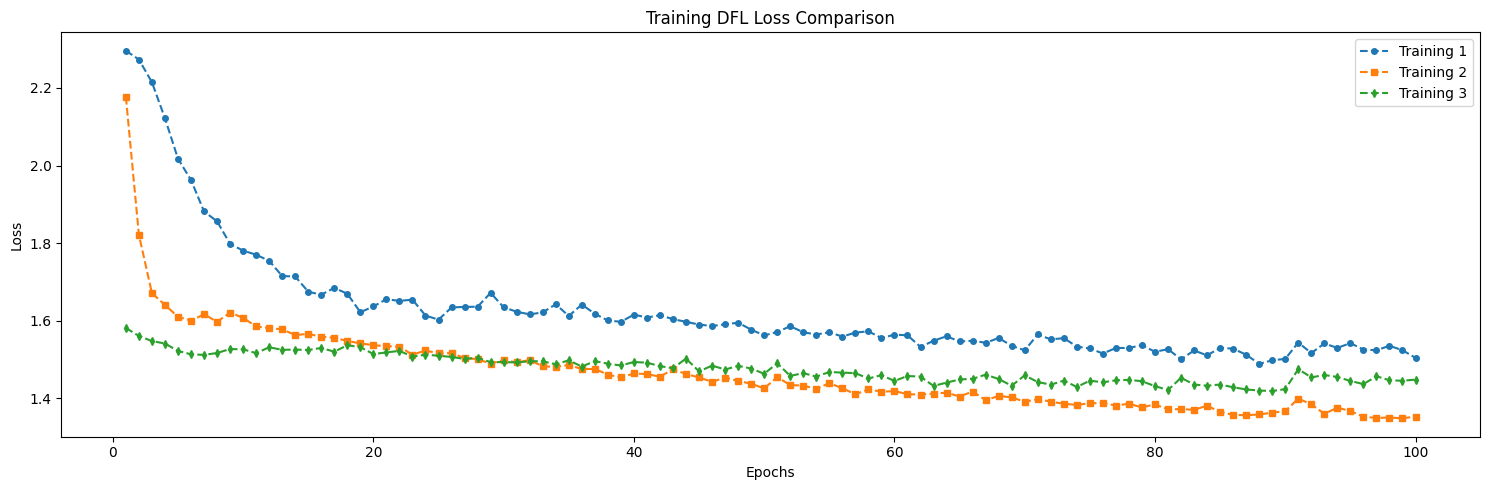

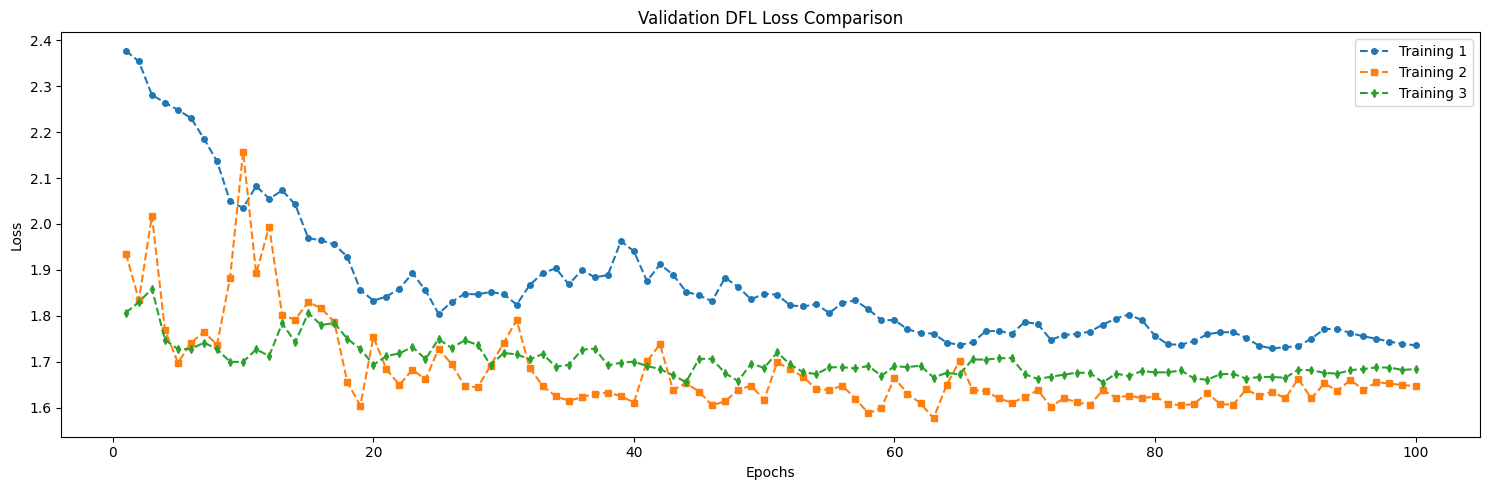

In [42]:
# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

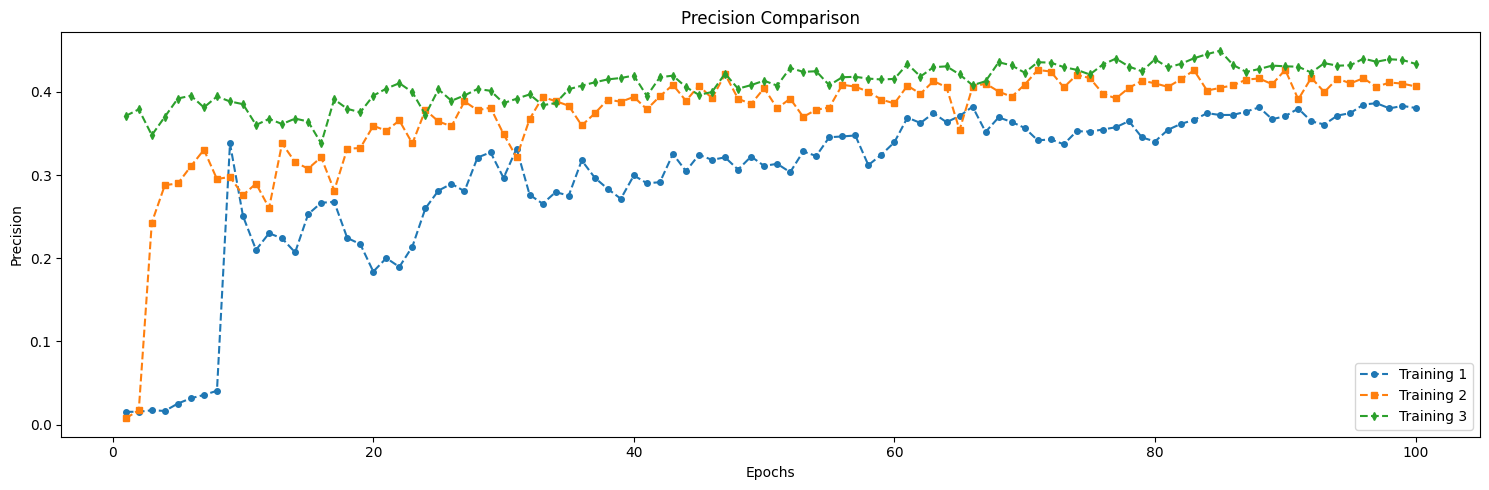

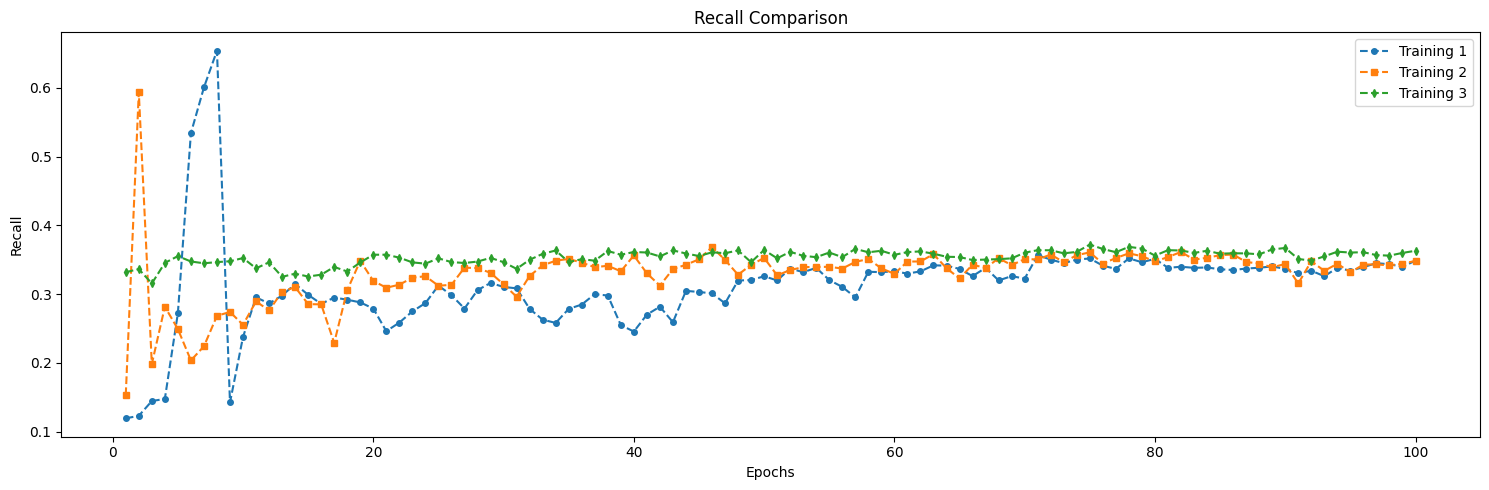

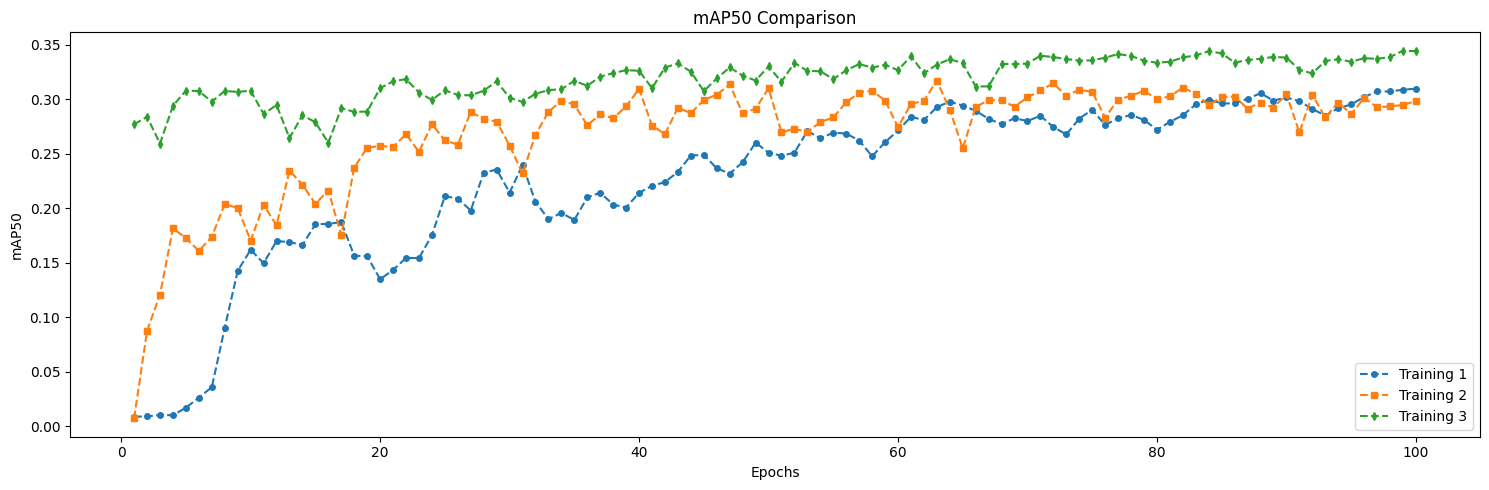

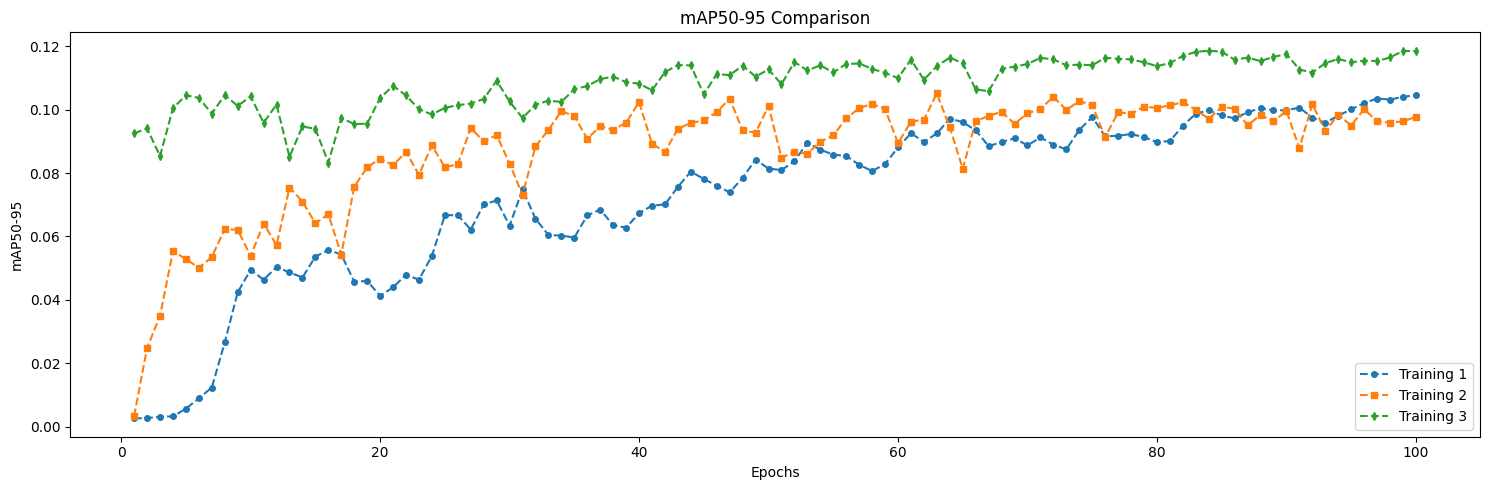

In [43]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

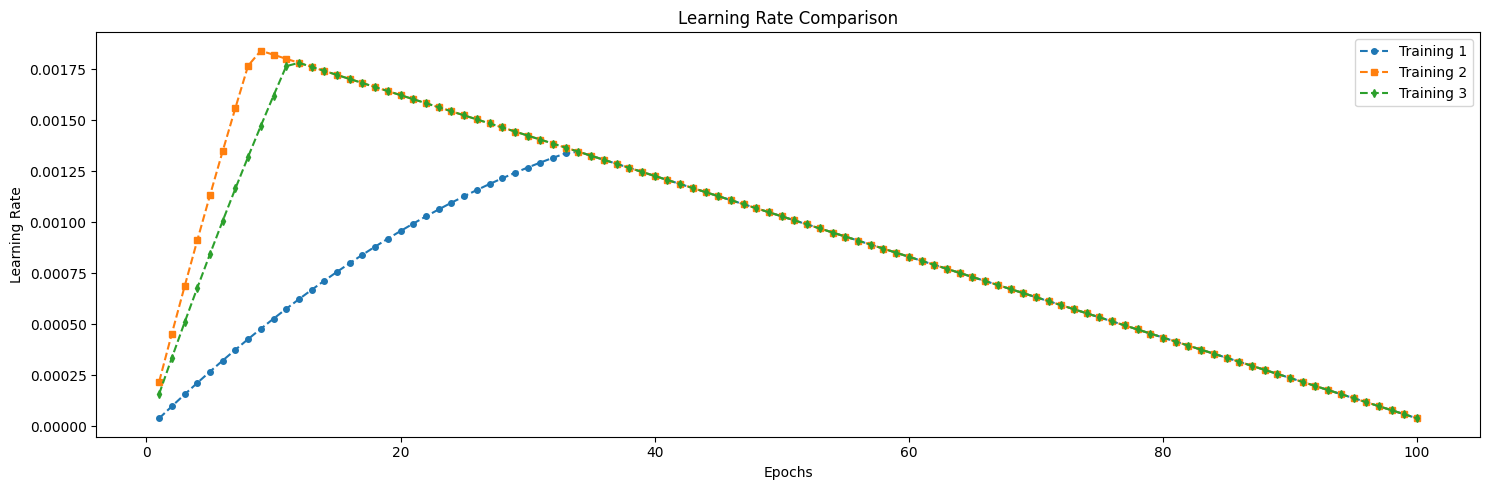

In [44]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos

| Experiment | Dataset (Size) | Images | Tiles | Tags | Train/Valid (%) | Train Time (min) | Inf Time (ms) | Total detections | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|------|------|--------------|---------|------|------|----------------|---------------|---------------|---------------|---------------|--------|
| **1º TRAIN** | Small & Mid | 4 | 1472 |  | 50% / 50% | *0* | ***0*** |  | % | % | % | ***0*** |
| **2º TRAIN** | Small | 2 | 736 |  | 50% / 50% | *0* | ***0*** |  | % | % | % | ***0*** |
| **3º TRAIN** | Mid | 2 | 736 |  | 50% / 50% | *0* | ***0*** |  | % | % | % | ***0*** |

## Comparación de los Entrenamientos

### Análisis del Dataset
1. **Cantidad de imágenes y etiquetas**:  
  -  

2. **Distribución de Train/Valid**:  
  -  

3. **Tamaño de imágenes (small vs mid)**:  
  -  

### Análisis de los Hiperparámetros
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  

### Análisis de Resultados
#### Métricas Generales
1. **Precisión (Precision) y Recall**:  
  -  

2. **mAP50**:  
  - 
  
3. **Confusión entre clases (False Positives y False Negatives)**:  
  - 
  
### Conclusiones Generales
1. 

# Conclusión Final


## Estrategias para Próximos Entrenamientos
1. **Dataset**
- 

2. **Hiperparámetros**
-  

3. **Optimización del Modelo**
- 

4. **Evaluación y Métricas**
-  